## Applied Machine Learning:
    Assignment 01
    Sai Lakshmi Nikitha Akarapu
    SXA210112

Seoul Bike Sharing Demand:

Data Set Information:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 1. Data Import:
Import the given datasets. Explore shape and size.

In [2]:
Dataset = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')

In [3]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
Dataset.shape

(8760, 14)

Number of rows and columns in the dataframe is 8760 and 14 respectively.

In [5]:
Dataset.size

122640

The size of dataframe is 122640 which is equivalent to total number of rows*columns

In [6]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [7]:
# Dataset['Rainfall(mm)'] = np.sqrt(Dataset['Rainfall(mm)'])
# Dataset['Snowfall (cm)'] = np.sqrt(Dataset['Snowfall (cm)'])

In [8]:
Dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [9]:
# Dataset['Solar Radiation (MJ/m2)'] = np.sqrt(Dataset['Solar Radiation (MJ/m2)'])
# Dataset['Visibility (10m)'] = np.sqrt(Dataset['Visibility (10m)'])

## 2. Data Preparation tasks:

Handling Missing values

Convert categorical variables to continuous using functional knowledge

And Drop attribute/s if required


In [10]:
# Explore data types
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
# Missing Values
Dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above output, we can conclude that there are no missing values in the dataset.

In [12]:
Dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

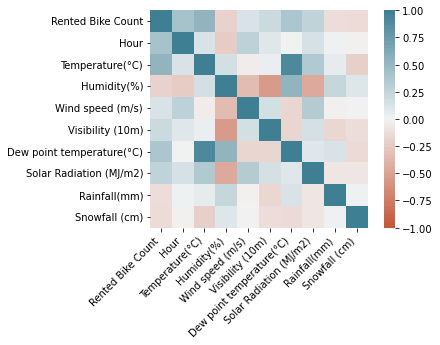

In [13]:
corr = Dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='Date', ylabel='Dew point temperature(°C)'>

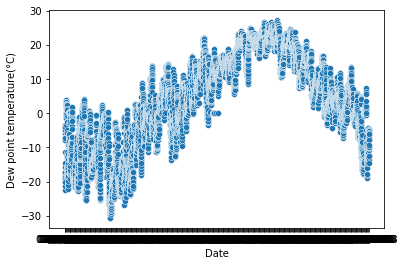

In [14]:
sns.scatterplot(x='Date', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

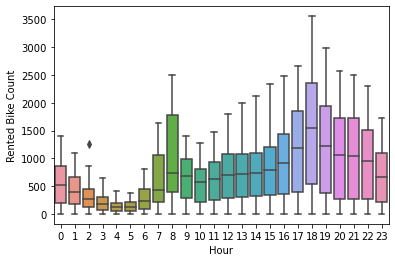

In [15]:
sns.boxplot(x = 'Hour', y = 'Rented Bike Count', data = Dataset)

## Data Cleaning:
Converting categories to dummies

In [16]:
# Automate categorical vs numerical variables separation
Summary=Dataset.describe().T
Conti=Summary.index
Column_name=Dataset.columns
All=[]
for i in range(len(Conti)):
    for j in range(len(Column_name)):
        if Conti[i]!=Column_name[j]:
            All.append(Column_name[j])
Categorical=list(set(All)-set(Conti))
Continuous=list(set(All)-set(Categorical))
print("Continuous Variables:",Continuous)
print("\nCategorical variables found in the dataset:\n",Categorical)

Continuous Variables: ['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count', 'Dew point temperature(°C)', 'Visibility (10m)', 'Wind speed (m/s)', 'Temperature(°C)', 'Solar Radiation (MJ/m2)', 'Humidity(%)']

Categorical variables found in the dataset:
 ['Holiday', 'Functioning Day', 'Date', 'Seasons']


In [17]:
pd.unique(Dataset.Seasons)

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [18]:
Dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
pd.unique(Dataset.Holiday)

array(['No Holiday', 'Holiday'], dtype=object)

Coverting date to year, month, day colums

In [20]:
import datetime
Dataset['Date'] = pd.to_datetime(Dataset['Date'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
Dataset['Year'] = pd.DatetimeIndex(Dataset['Date']).year
Dataset['Month'] = pd.DatetimeIndex(Dataset['Date']).month
Dataset['Day'] = pd.DatetimeIndex(Dataset['Date']).day

In [21]:
Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  12/01/2017                254     0             -5.2           37   
1  12/01/2017                204     1             -5.5           38   
2  12/01/2017                173     2             -6.0           39   
3  12/01/2017                107     3             -6.2           40   
4  12/01/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month  Day  
0             Yes  2017     12    1  
1             Yes  2017     12    1  
2             Yes  2017     12    1  
3             Yes  2017     12    1  
4             Yes  2017     12    1

In [22]:
Dataset = Dataset.drop('Date',axis=1)

In [23]:
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

   Month  Day  
0     12    1  
1     12    1  
2     12    1  
3     12    1  
4     12    1

Creating dummies for Seasons categorical variable

In [24]:
dummies = pd.get_dummies(Dataset.Seasons)
Dataset = pd.concat([Dataset, dummies], axis='columns')
Dataset = Dataset.drop(['Seasons', 'Winter'], axis='columns') 
Dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)     Holiday Functioning Day  Year  Month  Day  \
0           0.0            0.0  No Holiday             Yes  2017     12    1   
1           0.0            0.0  No Holiday             Yes  2017     12    1   
2           0.0            0.0  No Holiday             Yes  2017     12    1   
3           0.0            0.0  No Holiday             Yes  2017     12    1   
4           0.0            0.0  No Holiday             Yes  2017     12    1   

   Autumn  Spring  Summer  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0

In [25]:
dummies = pd.get_dummies(Dataset.Hour)
Dataset = pd.concat([Dataset, dummies], axis='columns')
Dataset = Dataset.drop(['Hour', 23], axis='columns') 
Dataset.rename(columns = {0:'Hour_0',1:'Hour_1',2:'Hour_2',3:'Hour_3',4:'Hour_4',5:'Hour_5',6:'Hour_6',7:'Hour_7',8:'Hour_8',9:'Hour_9',
                         10:'Hour_10',11:'Hour_11',12:'Hour_12',13:'Hour_13',14:'Hour_14',15:'Hour_15',
                         16:'Hour_16',17:'Hour_17',18:'Hour_18',19:'Hour_19',20:'Hour_20',21:'Hour_21',22:'Hour_22'}, inplace = True)
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)     Holiday  ... Hour_13  Hour_14  Hour_15  \
0           0.0            0.0  No Holiday  ...       0        0        0   
1           0.0            0.0  No Holiday  ...       0        0        0   
2           0.0            0.0  No Holiday  ...       0        0        0   
3           0.0            0.0  No Holiday  ...       0        0        0   
4           0.0            0.0  No Holiday  ...       0        0        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 40 columns]

In [26]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   object 
 10  Functioning Day            8760 non-null   object 
 11  Year                       8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Day                        8760 non-null   int64

Converting Functioning Day and Holiday columns to binaries

In [27]:
Dataset['Functioning Day'] = Dataset['Functioning Day'].map(
                   {'Yes':1 ,'No':0})

In [28]:
Dataset['Holiday'] = Dataset['Holiday'].map(
                   {'Holiday':1 ,'No Holiday':0})

In [29]:
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  ...  Hour_13  Hour_14  Hour_15  \
0           0.0            0.0        0  ...        0        0        0   
1           0.0            0.0        0  ...        0        0        0   
2           0.0            0.0        0  ...        0        0        0   
3           0.0            0.0        0  ...        0        0        0   
4           0.0            0.0        0  ...        0        0        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 40 columns]

Exploratory Data Analysis:

array([[<AxesSubplot:title={'center':'Temperature(°C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(°C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'Functioning Day'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Autumn'}>,
        <AxesSubplot:title={'center':'Spring'}>],
       [<AxesSubplot:title={'center':'Summer'}>,
        <AxesSubplot:title={'center':'Hour_0'}>,
        <AxesSubplot:title={'center':'Hour_1'}>],
       [<AxesSubplot:titl

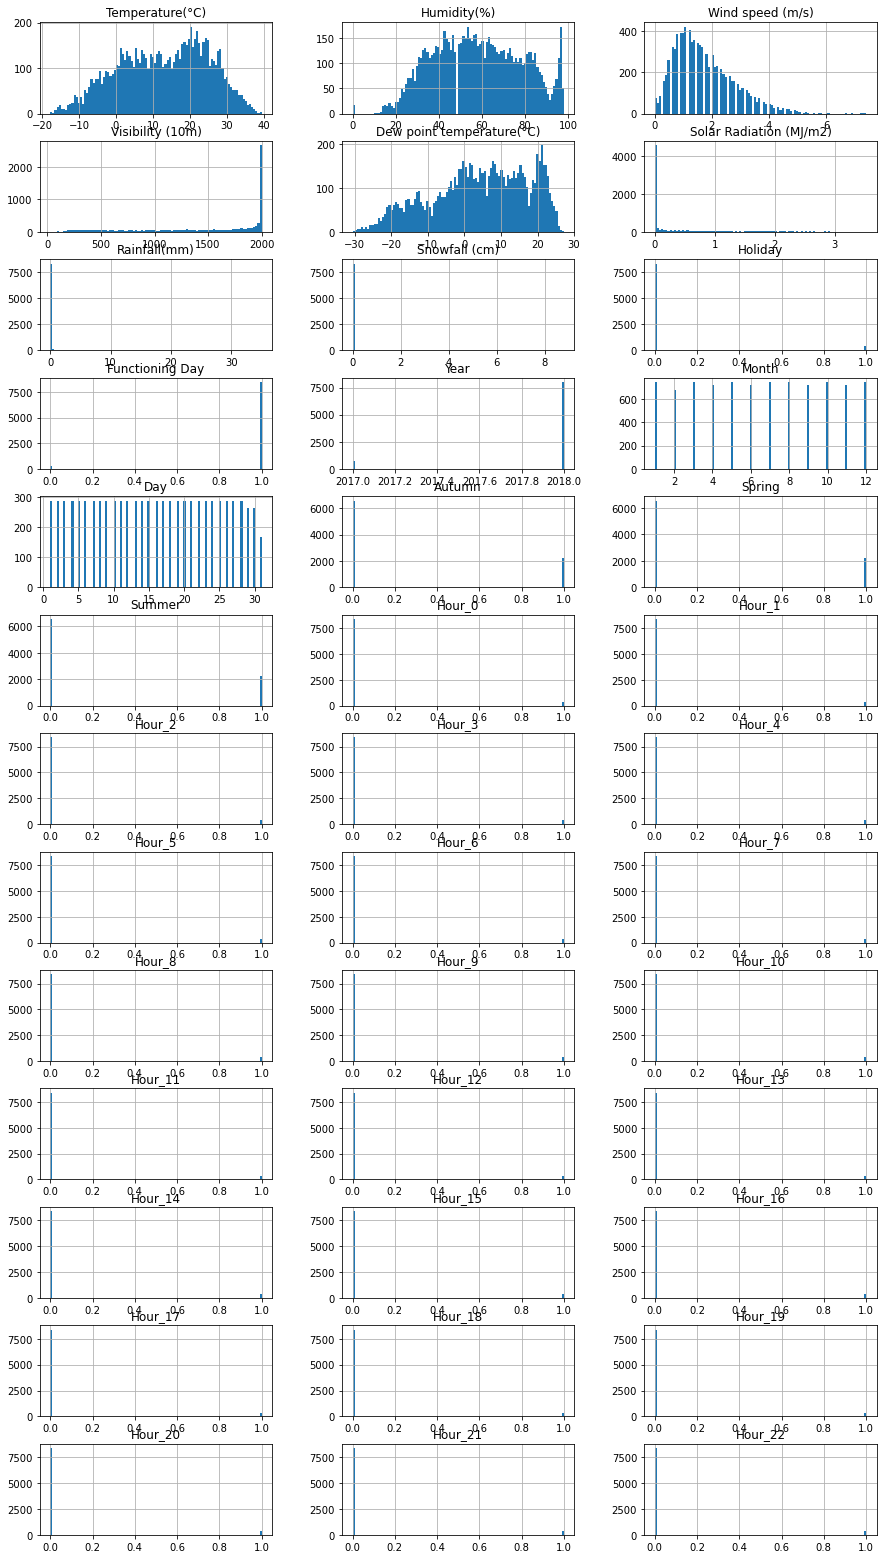

In [30]:
Dataset.hist(column=list(Dataset)[1:], figsize=(15,30),bins=100, layout=(14,3))

array([[<AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>]],
      dtype=object)

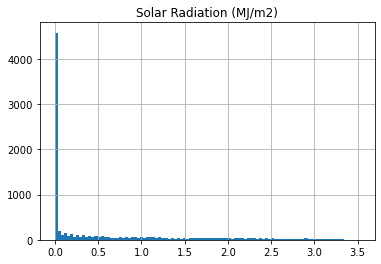

In [31]:
Dataset.hist(column='Solar Radiation (MJ/m2)',bins=100)

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>]], dtype=object)

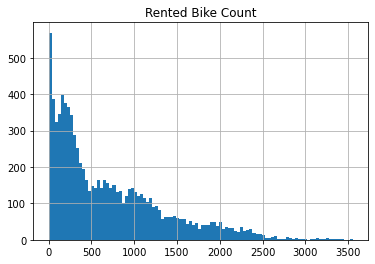

In [32]:
Dataset.hist(column='Rented Bike Count', bins=100)

In [33]:
Dataset.skew(axis=0, skipna=True, level=None)

Rented Bike Count             1.153428
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Holiday                       4.163603
Functioning Day              -5.170969
Year                         -2.978262
Month                        -0.010458
Day                           0.007522
Autumn                        1.159123
Spring                        1.142294
Summer                        1.142294
Hour_0                        4.588103
Hour_1                        4.588103
Hour_2                        4.588103
Hour_3                        4.588103
Hour_4                        4.588103
Hour_5                        4.588103
Hour_6                        4.588103
Hour_7                        4.588103
Hour_8                   

In [34]:
Dataset.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   
Holiday                            -0.072338        -0.055931    -0.050278   
Functioning Day                     0.203943        -0.050170    -0.020800   
Year                                0.215162         0.377796     0.035925   
Month                               0.133514         0.216183     0.139875   
Day                                 0.022291         0.015645    -0.029044   
Autumn                              0.102753         0.059728     0.028367   
Spring                              0.022888         0.007960     0.015694   
Summer                              0.296549         0.665846     0.192595   
Hour_0                             -0.052743        -0.027873     0.069340   
Hour_1                             -0.090012        -0.034210     0.080928   
Hour_2                             -0.130280        -0.040002     0.092992   
Hour_3                             -0.162060        -0.045201     0.101493   
Hour_4                             -0.184930        -0.049869     0.107582   
Hour_5                             -0.182831        -0.054365     0.115690   
Hour_6                             -0.134827        -0.058000     0.122648   
Hour_7                             -0.031876        -0.057642     0.112716   
Hour_8                              0.100578        -0.047239     0.082302   
Hour_9                             -0.018951        -0.026309     0.022457   
Hour_10                            -0.057153         0.000475    -0.032731   
Hour_11                            -0.033542         0.024916    -0.078435   
Hour_12                            -0.001669         0.045027    -0.110055   
Hour_13                             0.009261         0.058879    -0.134240   
Hour_14                             0.017530         0.068674    -0.147539   
Hour_15                             0.040278         0.072505    -0.150092   
Hour_16                             0.073072         0.070066    -0.139767   
Hour_17                             0.140281         0.058864    -0.110644   
Hour_18                             0.258096         0.042210    -0.075489   
Hour_19                             0.158592         0.024399    -0.036126   
Hour_20                             0.117798         0.008845    -0.005319   
Hour_21                             0.105669        -0.002404     0.019287   
Hour_22                             0.070542        -0.011788     0.038870   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   
Holiday                            0.023017          0.031773   
Functioning Day                    0.005037         -0.026000   
Year                              -0.003781     

In [35]:
def plot_corr(Dataset, size=26):
    corr = Dataset.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

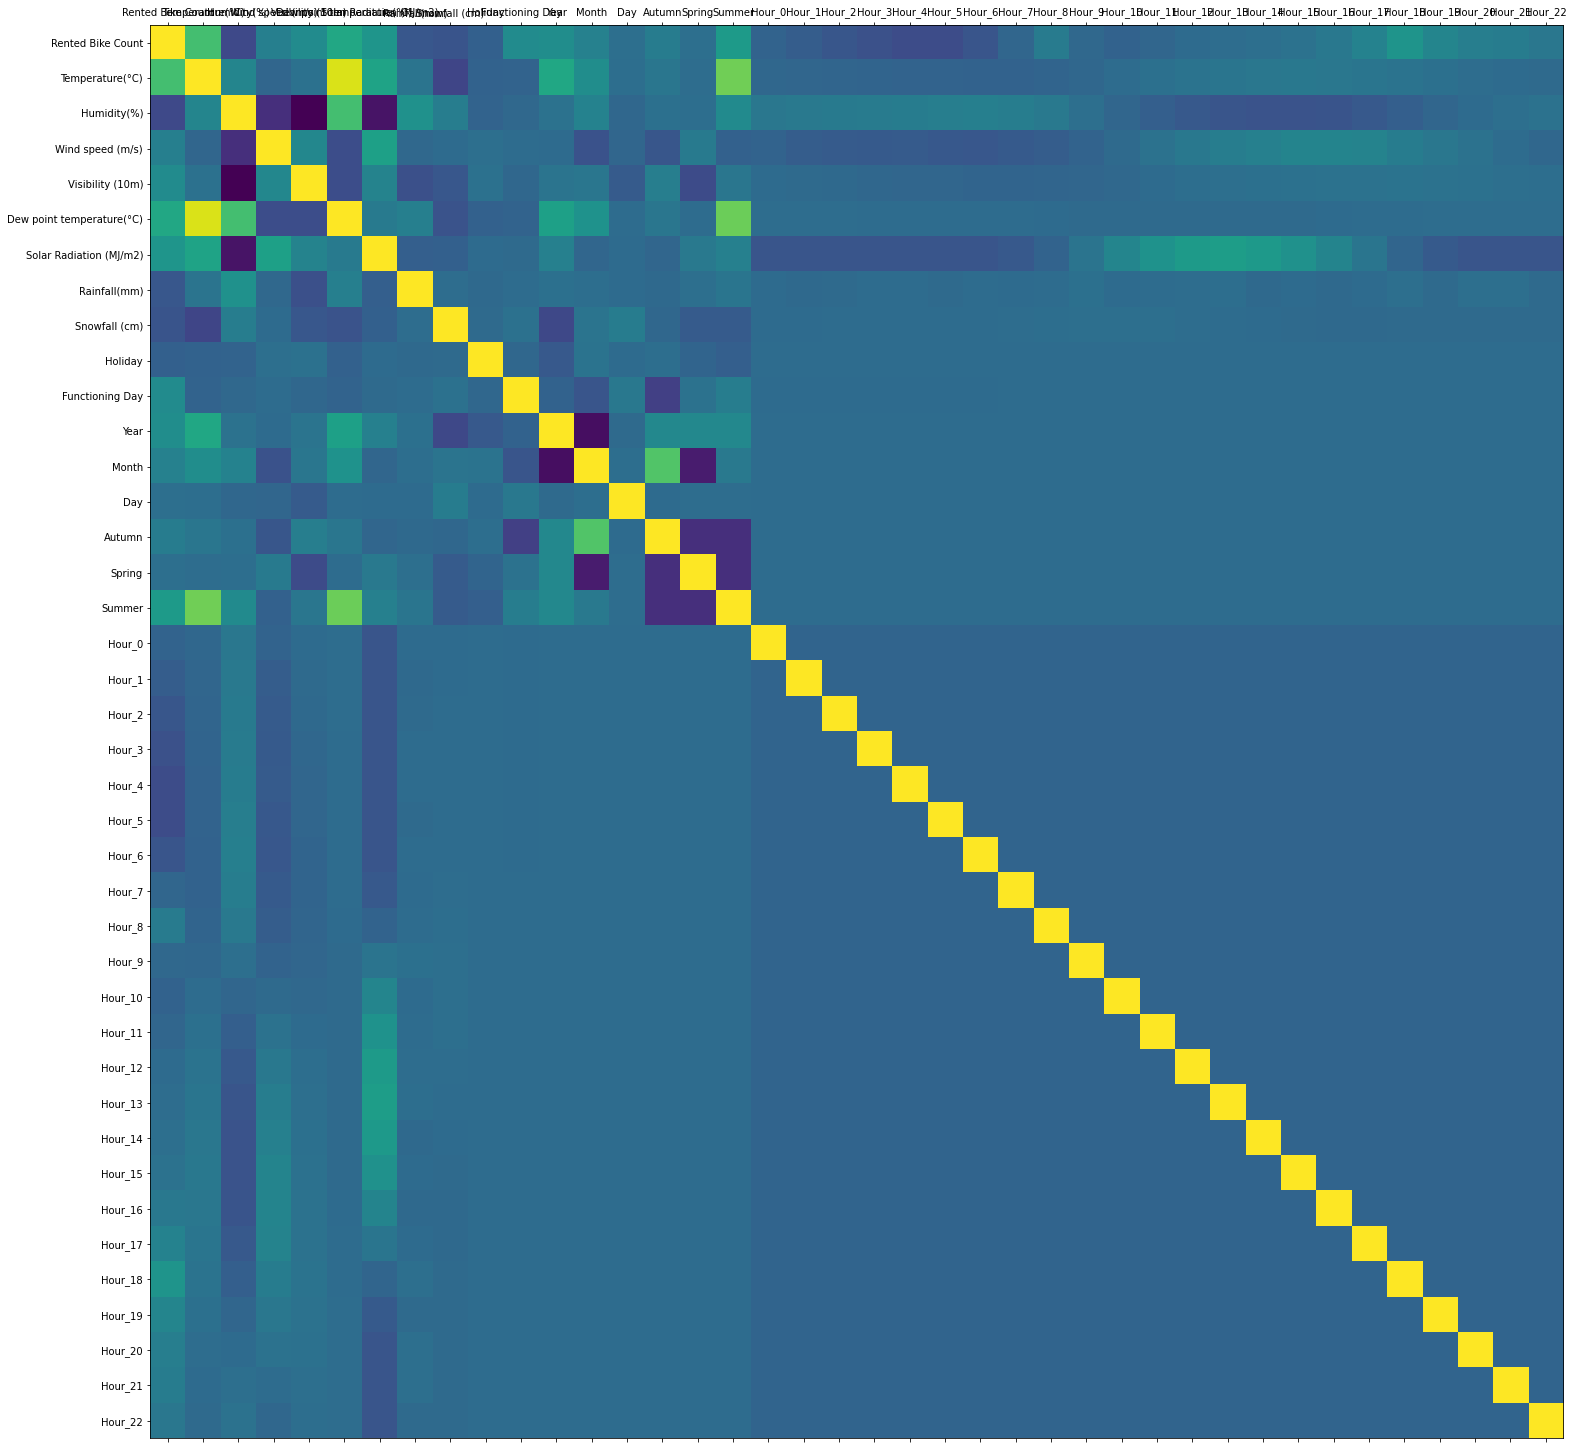

In [36]:
plot_corr(Dataset)

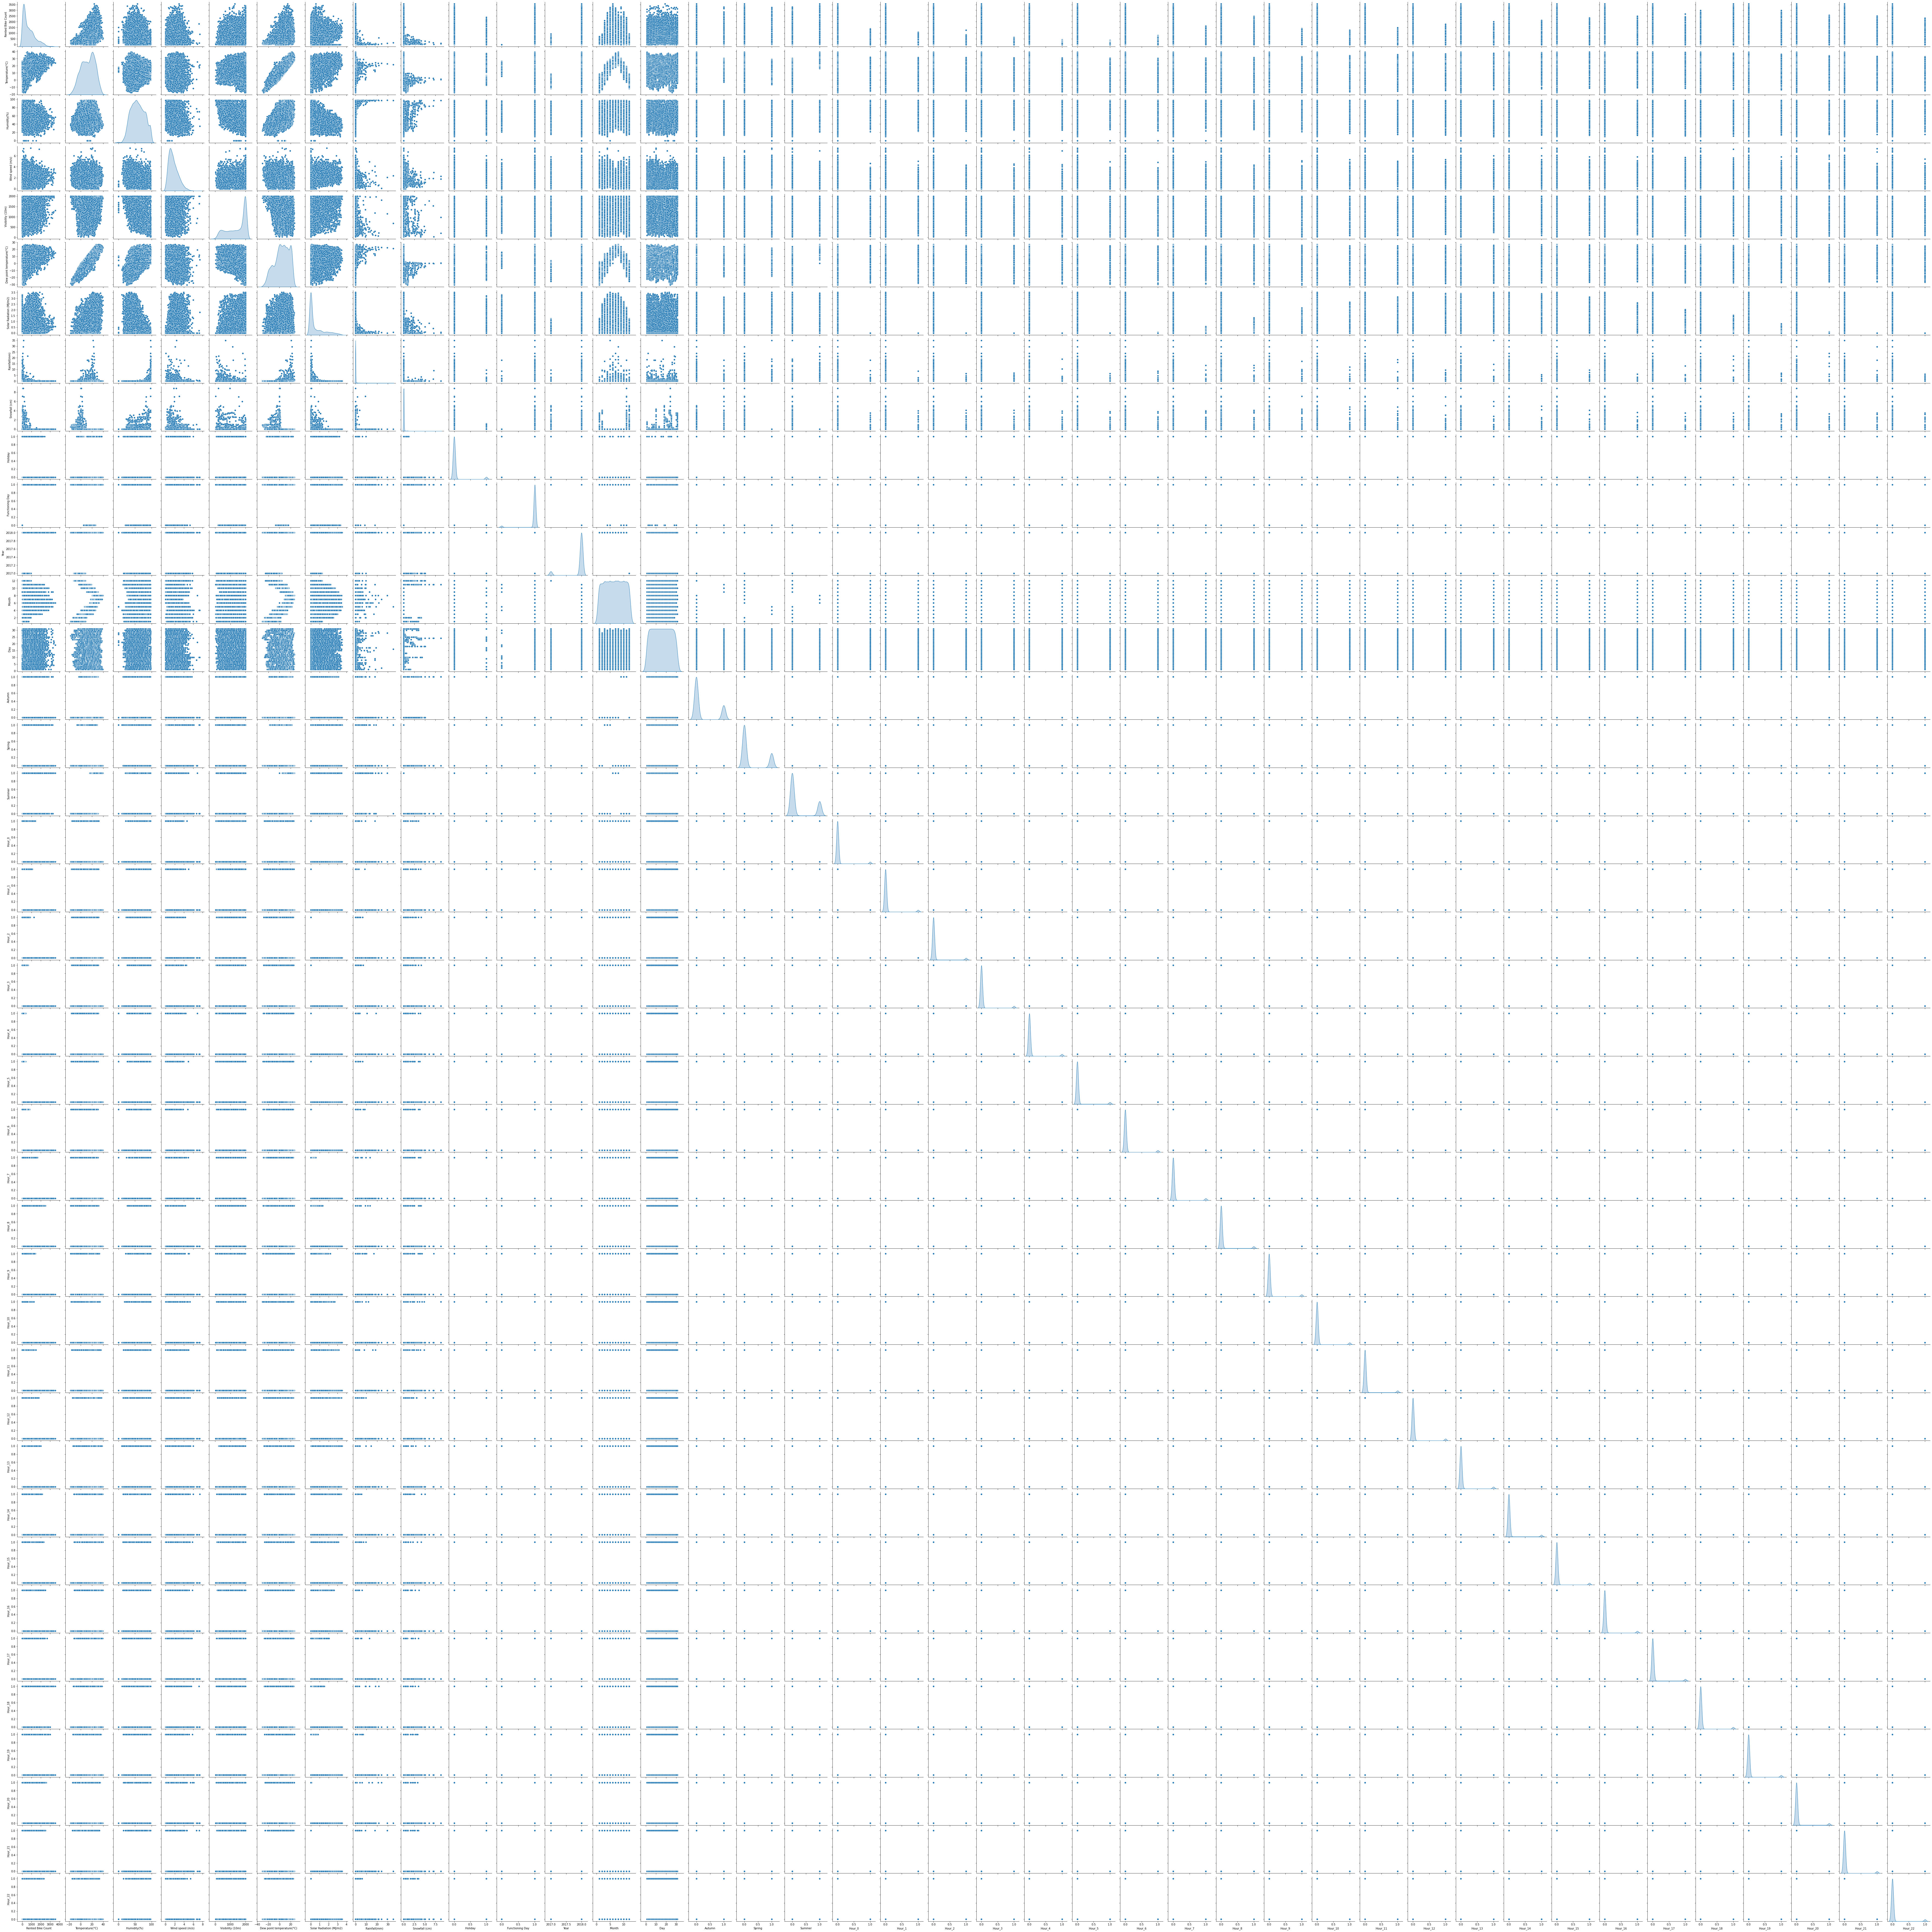

In [37]:
sns.pairplot(Dataset,diag_kind='kde')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

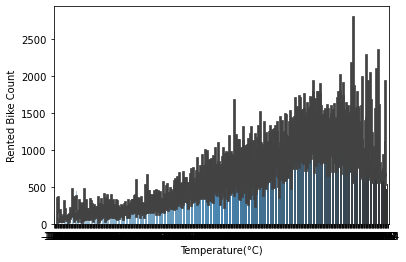

In [39]:
sns.barplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

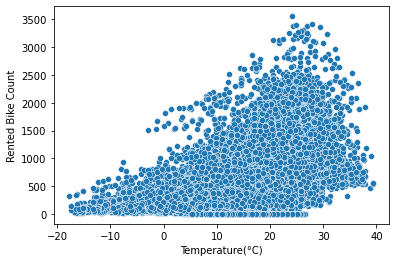

In [40]:
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

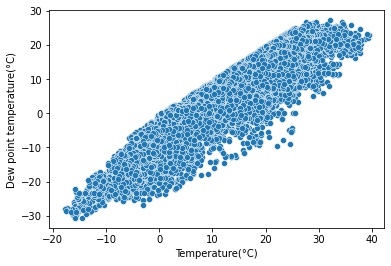

In [41]:
sns.scatterplot(x='Temperature(°C)', y='Dew point temperature(°C)', data=Dataset, palette='Blues_d')

From the above plot, we can observe the perfect linear relation between temperature and Dew point temperature. Due to collinearity issue, dropping one of the variables.

In [42]:
Dataset = Dataset.drop('Dew point temperature(°C)', axis = 1)

In [43]:
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
0        0                1  ...        0        0        0        0        0   
1        0                1  ...        0        0        0        0        0   
2        0                1  ...        0        0        0        0        0   
3        0                1  ...        0        0        0        0        0   
4        0                1  ...        0        0        0        0        0   

   Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 39 columns]

In [44]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  Year                     8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  Autumn                   8760 non-null   uint8  
 14  Spring                  

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

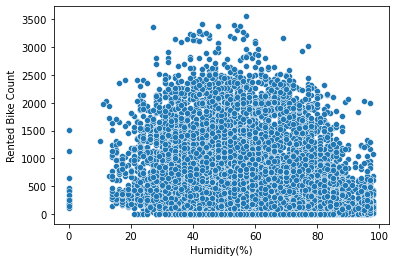

In [45]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

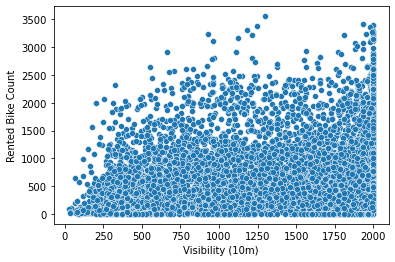

In [46]:
sns.scatterplot(y='Rented Bike Count', x='Visibility (10m)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

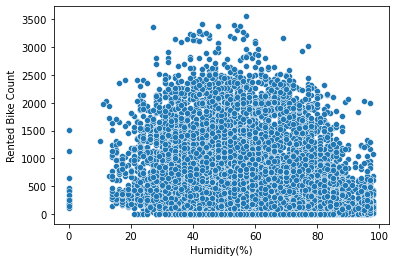

In [47]:
sns.scatterplot(y='Rented Bike Count', x='Humidity(%)', data=Dataset, palette='Blues_d')

<AxesSubplot:xlabel='Wind speed (m/s)'>

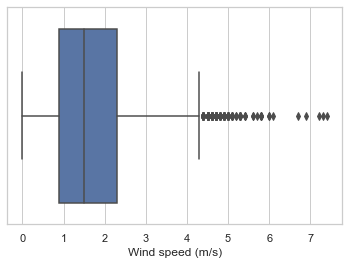

In [48]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Wind speed (m/s)', data = Dataset)

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

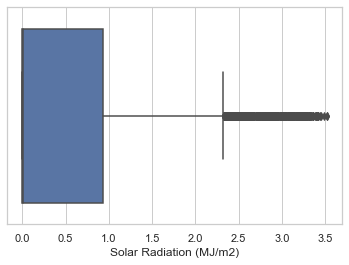

In [49]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='Solar Radiation (MJ/m2)', data = Dataset)

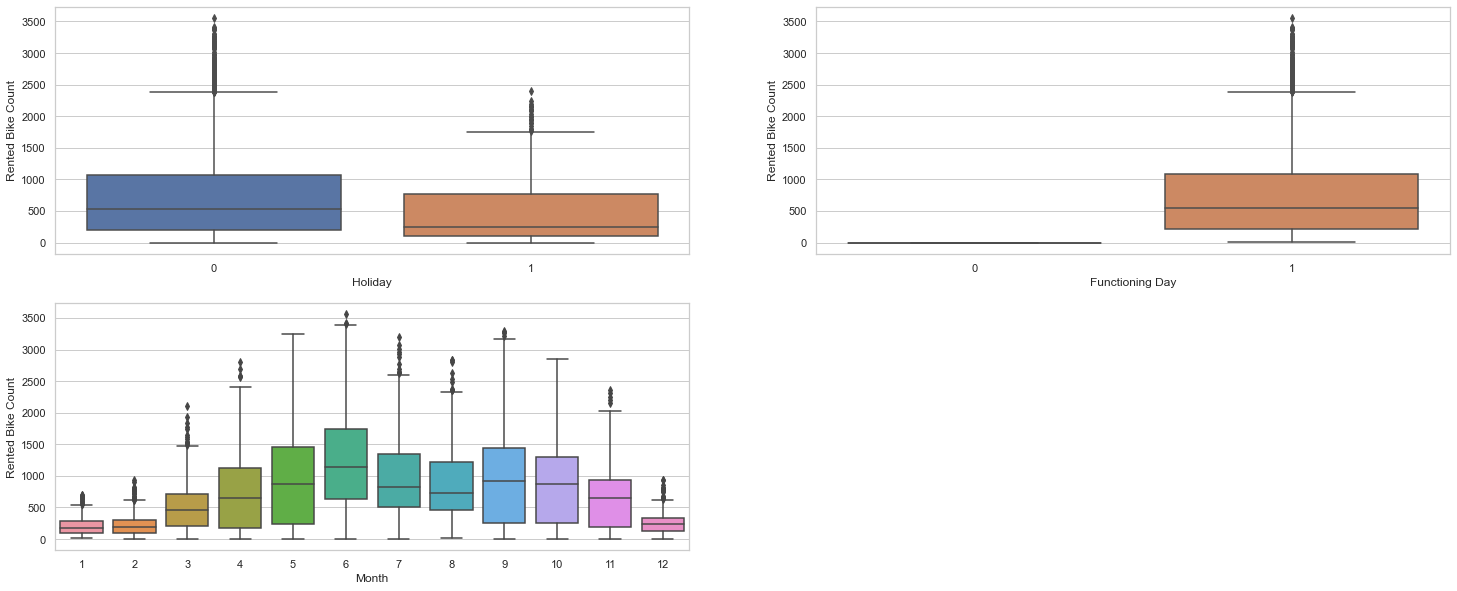

In [50]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = Dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = Dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = Dataset)
plt.show()

## Part1: Data Spliting

In [51]:
# Independent vs target variable
y = Dataset['Rented Bike Count']                  # Target variable
x = Dataset.drop(['Rented Bike Count'],axis=1)    # Predictor variable

In [52]:
# Split: Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # shuffle=True

In [53]:
x_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5129             25.3           87               0.6               751   
6490             25.4           75               0.7              1995   
6672             21.1           64               1.5              2000   
68                5.2           87               1.4               253   
8224             11.7           96               1.4               587   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
5129                     0.49           0.0            0.0        0   
6490                     0.96           0.0            0.0        0   
6672                     0.00           0.0            0.0        0   
68                       0.00           0.0            0.0        0   
8224                     0.02           0.0            0.0        0   

      Functioning Day  Year  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
5129                1  2018  ...        0        0        0        0        1   
6490                1  2018  ...        0        0        0        0        0   
6672                1  2018  ...        0        0        0        0        0   
68                  1  2017  ...        0        0        0        0        0   
8224                1  2018  ...        0        0        0        1        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
5129        0        0        0        0        0  
6490        0        0        0        0        0  
6672        0        0        0        0        0  
68          0        0        1        0        0  
8224        0        0        0        0        0  

[5 rows x 38 columns]

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 5129 to 235
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature(°C)          6132 non-null   float64
 1   Humidity(%)              6132 non-null   int64  
 2   Wind speed (m/s)         6132 non-null   float64
 3   Visibility (10m)         6132 non-null   int64  
 4   Solar Radiation (MJ/m2)  6132 non-null   float64
 5   Rainfall(mm)             6132 non-null   float64
 6   Snowfall (cm)            6132 non-null   float64
 7   Holiday                  6132 non-null   int64  
 8   Functioning Day          6132 non-null   int64  
 9   Year                     6132 non-null   int64  
 10  Month                    6132 non-null   int64  
 11  Day                      6132 non-null   int64  
 12  Autumn                   6132 non-null   uint8  
 13  Spring                   6132 non-null   uint8  
 14  Summer                

In [55]:
x_test.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
4136             18.2           63               0.8              1731   
6705             23.5           72               0.5              1485   
3538             15.3           50               1.0               944   
6583             21.1           81               1.0              1738   
1993             -2.2           58               1.0              2000   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
4136                     1.00           0.0            0.0        1   
6705                     0.95           0.0            0.0        0   
3538                     1.97           0.0            0.0        0   
6583                     0.14           0.0            0.0        0   
1993                     0.00           0.0            0.0        0   

      Functioning Day  Year  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
4136                1  2018  ...        0        0        0        0        0   
6705                1  2018  ...        0        0        0        0        0   
3538                1  2018  ...        0        0        0        0        0   
6583                1  2018  ...        0        0        0        0        0   
1993                1  2018  ...        0        0        0        0        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
4136        0        0        0        0        0  
6705        0        0        0        0        0  
3538        0        0        0        0        0  
6583        0        0        0        0        0  
1993        0        0        0        0        0  

[5 rows x 38 columns]

Data Scaling:

In [56]:
print(x_train['Rainfall(mm)'].describe())
print(x_train['Snowfall (cm)'].describe())
print(x_test['Rainfall(mm)'].describe())
print(x_test['Snowfall (cm)'].describe())

count    6132.000000
mean        0.155545
std         1.192167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64
count    6132.000000
mean        0.075718
std         0.428246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64
count    2628.000000
mean        0.132686
std         0.962546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: Rainfall(mm), dtype: float64
count    2628.000000
mean        0.073554
std         0.456043
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transform=sc.fit_transform(x_train)

In [58]:
sc=StandardScaler()
x_test_transform=sc.fit_transform(x_test)

In [59]:
print(x_test_transform)

[[ 0.44609838  0.25194735 -0.92577124 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.89918082  0.69319567 -1.22243346 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.19818534 -0.38541135 -0.72799643 ... -0.19992084 -0.21585871
  -0.19260192]
 ...
 [-1.19525687 -1.12082523  0.95308945 ... -0.19992084 -0.21585871
  -0.19260192]
 [-0.00698406 -0.97374245  0.85420205 ... -0.19992084 -0.21585871
  -0.19260192]
 [-1.01573364 -0.87568727 -1.22243346 ... -0.19992084 -0.21585871
   5.19205613]]


## Part 2: Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(x_train_transform, y_train)

LinearRegression()

In [61]:
LRModel.score(x_train_transform, y_train)

0.6630539134122202

In [62]:
LRModel.score(x_test_transform, y_test)

0.6665091047378335

In [63]:
print(f'intercept: {LRModel.intercept_}')
print(f'slopes: {LRModel.coef_}')

intercept: 702.5843118069712
slopes: [ 276.59909701 -141.95555904   -4.90374157    3.5992696    61.94703617
  -63.50184525    9.04722672  -30.01851491  166.08950649 -156.6713896
 -149.76464824   -4.87930825  332.16642974  154.08935986  212.13820362
  -20.61150822  -42.98574707  -64.00965962  -82.91783616  -88.22775075
  -89.57905795  -55.77453144    4.06589389   75.17501974  -15.7511514
  -63.93597617  -61.24584433  -60.47138226  -59.5988534   -57.24857193
  -41.79215746  -13.98700058   35.89715736  128.02665645   86.29926915
   62.29645139   66.98999226   43.90886085]


In [64]:
y_pred = LRModel.predict(x_test_transform)
print(f"predicted response:\n{y_pred}")

predicted response:
[1152.40808558 1131.89251606  705.6122603  ...  192.09107301 1017.68943409
  650.97924985]


In [65]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.667
Mean Absolute Error: 278.047
Mean Squared Error: 135206.245
Root Mean Squared Error: 367.704


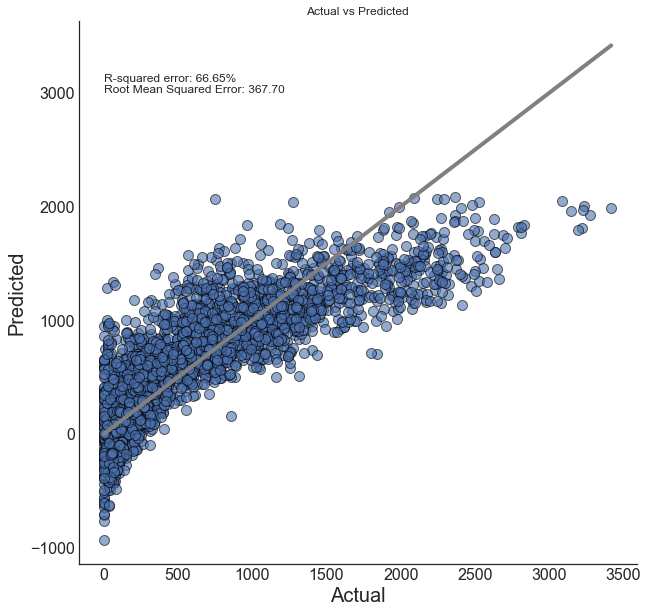

In [66]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(LRModel.score(x_test_transform,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(y_test,y_pred,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

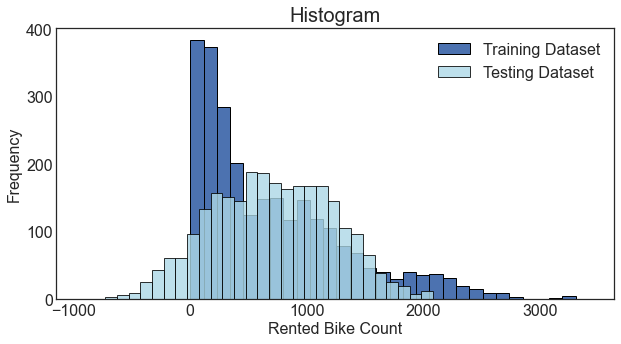

In [67]:
fig = plt.figure(figsize=(10,5))
plt.title('Histogram', fontsize=20)
plt.xlabel('Rented Bike Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.hist(y_test, bins=30, edgecolor='black', label='Training Dataset')
plt.hist(y_pred, bins=30, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Dataset')
plt.legend(fontsize=16)
plt.show()

## Part 3: Batch Gradient Descent

In [68]:
x.shape[0]

8760

In [69]:
stepsize_beta = np.ones(x_train_transform.shape[0])
stepsize_beta

array([1., 1., 1., ..., 1., 1., 1.])

In [70]:
def batch_gradient_descent(x,y, epoch, learning_rate,ep):



    number_of_variables = x.shape[1]
    converged = False
    coef = 0
    beta = np.ones(shape=(number_of_variables))
    y_predicted = np.dot(beta, x.T) + coef



    costinit = np.inf
    sample_size = x.shape[0]



    cost_list = []
    epoch_list = []
    stepsize_beta_list=[]
    stepsize_coef_list=[]
    i=0
    while not converged:
        # print(i)
        y_predicted = np.dot(beta, x.T) + coef
        beta_grad = -(1/sample_size)*(x.T.dot(y-y_predicted))
        coef_grad = -(1/sample_size)*np.sum(y-y_predicted)



        stepsize_beta = beta - learning_rate*beta_grad
        stepsize_coef = coef - learning_rate*coef_grad
        # print(stepsize_beta,stepsize_coef)



        beta = stepsize_beta
        coef = stepsize_coef

        cost = (1/2)*np.mean(np.square(y-y_predicted))
        cost_list.append(cost)
        #print(cost_list,cost)
        epoch_list.append(i)
        if (costinit < cost):
            print('alpha is high decrease alpha its not converging',costinit,cost,i)
            converged = True
        if (abs(costinit-cost) <= ep):
            print ('Converged, iterations: ', i,costinit,cost,cost_list[i-1],cost_list[i],abs(costinit-cost), '!!!')
            converged = True

        costinit = cost # update error
        i += 1 # update iter

        if i == epoch:
            print ('Max interactions exceeded!',cost)
            converged = True
    return beta,coef,cost_list,epoch_list

## Experiment 1:

In [71]:
start1=time.time()
beta1, coef1, cost_list1, epoch_list1 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 0.001)
end1=time.time()
time1=end1-start1
beta1,coef1,time1

Converged, iterations:  3292 70840.10440471618 70840.10340687261 70840.10440471618 70840.10340687261 0.0009978435700759292 !!!


(array([ 276.89847392, -141.82596978,   -4.91244006,    3.65578103,
          62.06122446,  -63.52403422,    9.01524701,  -30.03059533,
         166.07914113, -153.0276607 , -145.69956481,   -4.85831641,
         327.38902559,  152.39880018,  208.69397121,  -20.59572049,
         -42.97353431,  -64.00381111,  -82.89970981,  -88.21072669,
         -89.56316563,  -55.75670813,    4.08206054,   75.18146438,
         -15.75566792,  -63.95254518,  -61.28465228,  -60.51394518,
         -59.63920731,  -57.29363232,  -41.82733687,  -14.02212386,
          35.88612833,  128.02184985,   86.29444725,   62.31036463,
          66.99250385,   43.91068341]),
 702.5843118069694,
 1.2078578472137451)

In [72]:
cost_list1[-1]

70840.10340687261

In [73]:
start2=time.time()
beta2, coef2, cost_list2, epoch_list2 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.01,0.001)
end2=time.time()
time2=end2-start2
beta2,coef2,time2

Converged, iterations:  23435 70843.81374410173 70843.81274411886 70843.81374410173 70843.81274411886 0.0009999828762374818 !!!


(array([ 277.54879871, -141.54459113,   -4.93133544,    3.77858133,
          62.30833938,  -63.57229438,    8.94578006,  -30.05683216,
         166.05662173, -145.1144278 , -136.87131029,   -4.81273129,
         317.01378129,  148.72744897,  201.21406089,  -20.56012586,
         -42.94575922,  -63.98981652,  -82.85904895,  -88.1724872 ,
         -89.52732838,  -55.716692  ,    4.11846398,   75.19684226,
         -15.76409492,  -63.98701253,  -61.36735598,  -60.60476768,
         -59.72522479,  -57.38984736,  -41.90215667,  -14.09689307,
          35.86357409,  128.01272663,   86.28529195,   62.34187153,
          66.99920889,   43.91594713]),
 702.5843118069614,
 8.533199071884155)

In [74]:
start3=time.time()
beta3, coef3, cost_list3, epoch_list3 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.001,0.001)
end3=time.time()
time3=end3-start3
beta3, coef3, time3

Max interactions exceeded! 70947.14384960195


(array([ 281.47153691, -139.86794194,   -5.04634059,    4.5306444 ,
          63.60486387,  -63.8775061 ,    8.52556554,  -30.2138384 ,
         165.91927984,  -97.63723855,  -83.9142943 ,   -4.54001386,
         254.78093791,  126.73135872,  156.36561235,  -20.0639283 ,
         -42.50855798,  -63.62653176,  -82.33547715,  -87.66934745,
         -89.02672208,  -55.19423281,    4.61598891,   75.58725881,
         -15.51644041,  -63.866406  ,  -61.52277488,  -60.80093562,
         -59.89079517,  -57.61126907,  -42.00882525,  -14.21834692,
          36.03125506,  128.24320235,   86.51575182,   62.81056085,
          67.31019223,   44.23001625]),
 702.5843118068931,
 44.631269216537476)

In [75]:
start4=time.time()
beta4, coef4, cost_list4, epoch_list4 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.0001, 0.001)
end4=time.time()
time4=end4-start4
beta4, coef4, time4

Max interactions exceeded! 71946.72642124227


(array([ 263.19534203, -126.42602756,   -8.00776958,   11.9060292 ,
          65.68426617,  -67.04688925,    5.66969595,  -29.16672675,
         164.42359909,   31.06577956,   60.5727206 ,   -2.5259005 ,
         102.07283992,   85.39214136,   65.17212009,  -10.53102905,
         -33.87918506,  -55.1860062 ,  -73.85066248,  -79.21085964,
         -80.71308824,  -46.96307669,   12.79791796,   84.36291477,
          -6.1142078 ,  -52.95845184,  -49.77857913,  -48.31719845,
         -46.55191785,  -43.68917649,  -27.98947276,   -0.32921622,
          49.43454042,  140.73970531,   98.26081059,   74.37228198,
          77.51443614,   54.16478061]),
 702.5524304742091,
 38.953981161117554)

In [76]:
start5=time.time()
beta5, coef5, cost_list5, epoch_list5 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.00001, 0.001)
end5=time.time()
time5=end5-start5
beta5, coef5, time5

Max interactions exceeded! 119925.7773041


(array([165.94994878, -54.93671155,  13.59713   ,  43.2113808 ,
         53.74603902, -46.65772114, -25.02437013, -23.3417907 ,
         91.19744723,  54.44734235,  53.21354984,  10.79853865,
         44.25541547,  32.91618762,  70.87684619, -13.17552883,
        -26.21645219, -42.03558154, -54.35010523, -59.65002268,
        -60.92569791, -39.97019493,   1.74145402,  50.2467438 ,
         -4.39140544, -28.10756027, -20.29736618, -17.056723  ,
        -13.95097812,  -8.61379199,  -1.30299498,  17.21449933,
         43.0953247 ,  97.60942675,  67.30777393,  49.44151844,
         50.46716592,  33.92343711]),
 444.1192801405578,
 43.53051424026489)

In [77]:
beta6, coef6, cost_list6, epoch_list6 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 0.001)
beta6, coef6

Converged, iterations:  2980 66120.73972319592 66120.73872511498 66120.73972319592 66120.73872511498 0.0009980809409171343 !!!


(array([ 287.23037149, -120.13249059,   20.45294646,    6.7494479 ,
          63.84966968,  -75.40994796,   16.32645868,  -22.71654837,
         175.71883546,  -95.69488461,  -89.91044154,  -17.10389928,
         263.92727901,  119.69492649,  155.37329964,  -21.71961387,
         -39.32684755,  -59.18438775,  -70.47440163,  -98.7662035 ,
         -86.71966573,  -56.92829605,    3.88806624,   76.52220718,
         -17.05539883,  -61.10590309,  -75.79090551,  -54.23845838,
         -60.8809809 ,  -64.53814865,  -44.87238733,  -20.18566056,
          45.86028986,  129.0993279 ,   61.07196092,   73.4041653 ,
          58.5970126 ,   49.88056348]),
 709.3101217655886)

In [78]:
beta7, coef7, cost_list7, epoch_list7 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.01, 0.001)
beta7, coef7

Converged, iterations:  20552 66124.35575890292 66124.35475912398 66124.35575890292 66124.35475912398 0.0009997789456974715 !!!


(array([ 287.75682416, -119.86154075,   20.5034369 ,    6.80525485,
          64.07204328,  -75.48306415,   16.21125488,  -22.67742165,
         175.73854919,  -88.11131027,  -81.27333103,  -17.07736388,
         253.66934157,  116.06527373,  148.20850251,  -21.81972941,
         -39.41231147,  -59.2231389 ,  -70.5702416 ,  -98.85661548,
         -86.8004512 ,  -57.00849556,    3.80521711,   76.44617116,
         -17.14350016,  -61.22537254,  -75.88254873,  -54.37302364,
         -61.0491636 ,  -64.67153812,  -45.02416674,  -20.28186482,
          45.71942032,  129.00203157,   61.03289174,   73.29626452,
          58.55038764,   49.84041306]),
 709.3101217655948)

In [79]:
beta8, coef8, cost_list8, epoch_list8 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.001, 0.001)
beta8, coef8

Max interactions exceeded! 66175.9232091193


(array([ 289.84225772, -118.81850141,   20.69596681,    7.02894867,
          64.75186905,  -75.79021804,   15.75162808,  -22.51248601,
         175.81373443,  -57.95067895,  -46.9189958 ,  -16.97067879,
         212.90743333,  101.68615632,  119.78736442,  -21.9404333 ,
         -39.44521894,  -59.09027702,  -70.6636459 ,  -98.91249773,
         -86.84888834,  -57.04312866,    3.78252584,   76.44206192,
         -17.13477997,  -61.34468151,  -75.87145307,  -54.51842721,
         -61.32137955,  -64.83769396,  -45.26574553,  -20.32155391,
          45.49875014,  128.93760212,   61.15874853,   73.14877   ,
          58.66841474,   49.95372365]),
 709.3101217655447)

In [80]:
beta9, coef9, cost_list9, epoch_list9 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.0001, 0.001)
beta9, coef9

Max interactions exceeded! 66818.1549250648


(array([ 266.78031244, -108.83242769,   18.30103928,   12.21064898,
          63.83941477,  -78.27008331,   12.14820007,  -20.04800663,
         174.61478972,   40.48636422,   66.14771517,  -14.87676754,
          97.50256929,   75.15445926,   60.4139698 ,  -13.5987494 ,
         -30.34078529,  -50.39924319,  -62.4245031 ,  -90.98506755,
         -79.76243378,  -49.83926748,   11.87826503,   85.04121841,
          -5.36075512,  -49.00455635,  -61.94491271,  -39.66687543,
         -45.88375504,  -49.88113201,  -29.82984683,   -5.52622705,
          59.94606707,  142.5158686 ,   72.86953409,   83.24222057,
          69.76456297,   59.51603571]),
 709.2779352342646)

In [81]:
beta10, coef10, cost_list10, epoch_list10 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.00001, 0.001)
beta10, coef10

Max interactions exceeded! 115788.60776571422


(array([164.49453891, -50.84346135,  25.06005337,  44.77386488,
         52.69332431, -46.73890506, -23.30276555, -17.42168235,
         93.82045798,  56.44057831,  53.1921864 ,   2.68935609,
         45.39976817,  25.45294695,  70.12452082, -10.01220345,
        -26.48519576, -38.85948969, -49.23815553, -65.36234353,
        -58.18411716, -39.8466977 ,  -3.07464   ,  49.22802748,
         -1.39440248, -21.98514305, -28.1919149 ,  -8.40111693,
         -9.66177096, -15.4999608 ,   0.69183654,   9.02603544,
         52.75336608, 101.36507364,  51.50232232,  51.8063788 ,
         40.13126621,  34.97286336]),
 448.3708152617216)

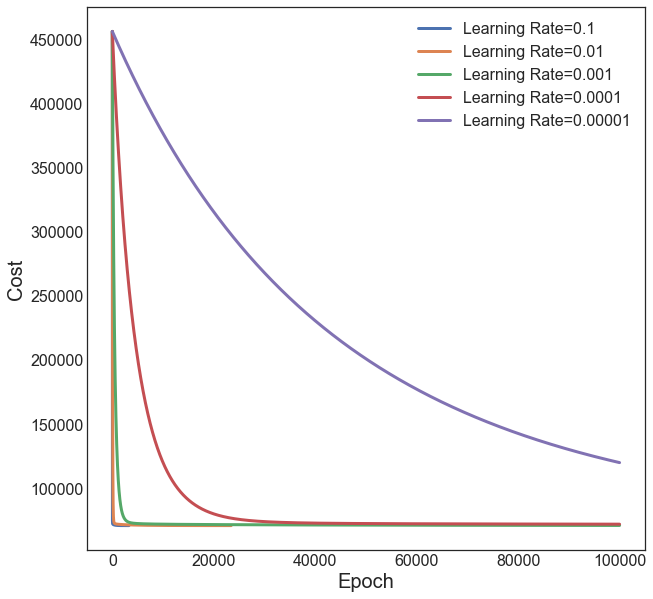

In [82]:
plt.plot(cost_list1,label="Learning Rate=0.1")
plt.plot(cost_list2,label="Learning Rate=0.01")
plt.plot(cost_list3,label="Learning Rate=0.001")
plt.plot(cost_list4,label="Learning Rate=0.0001")
plt.plot(cost_list5,label="Learning Rate=0.00001")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

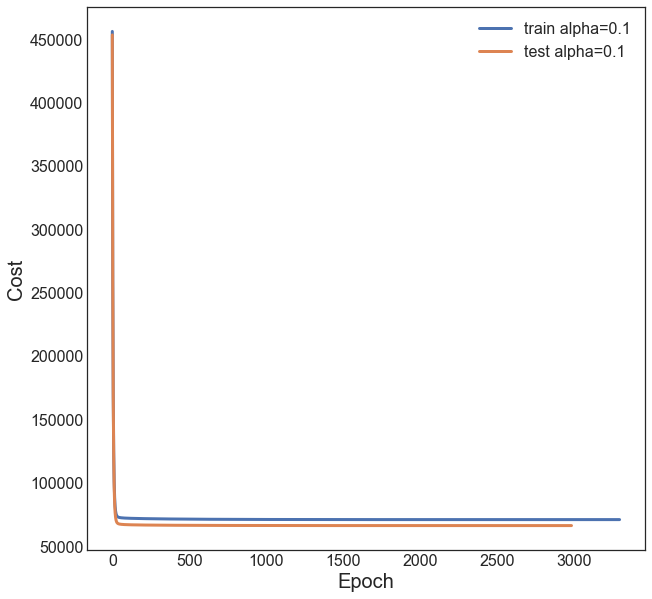

In [83]:
plt.plot(cost_list1,label="train alpha=0.1")
plt.plot(cost_list6,label="test alpha=0.1")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

## Train and Test Errors against learning rate:

In [84]:
learning_rate = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
cost_train = [cost_list5[-1], cost_list4[-1], cost_list3[-1], cost_list2[-1], cost_list1[-1]]
cost_test = [cost_list10[-1], cost_list9[-1], cost_list8[-1], cost_list7[-1],cost_list6[-1]]

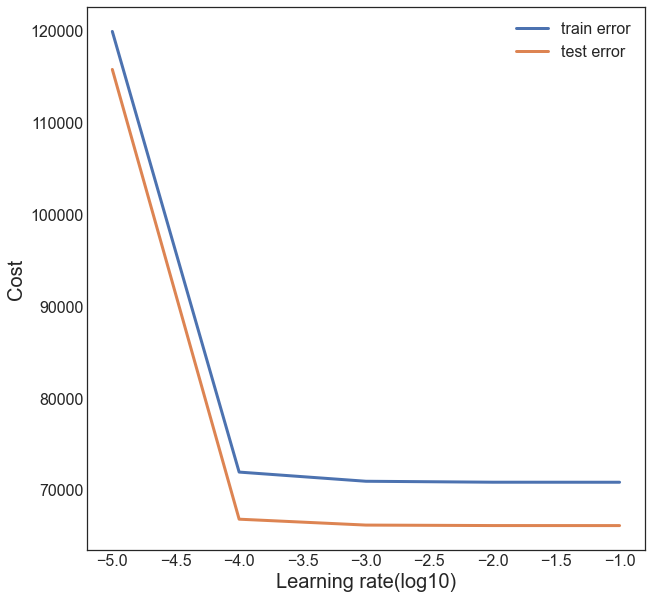

In [85]:
plt.plot(np.log10(learning_rate),cost_train, label="train error")
plt.plot(np.log10(learning_rate),cost_test, label="test error")
plt.legend(loc="upper right")
plt.xlabel("Learning rate(log10)")
plt.ylabel("Cost")
plt.show()

## Time Complexity Plot:

In [86]:
learning_rate=[1e-5,1e-4,1e-3,1e-2,1e-1]
times=[time5,time4,time3,time2,time1]

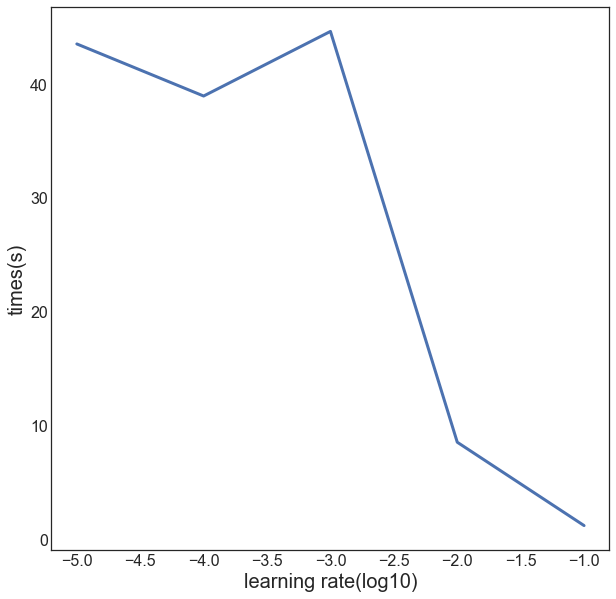

In [87]:
plt.plot(np.log10(learning_rate),times)
plt.xlabel("learning rate(log10)")
plt.ylabel( "times(s)")
plt.show()

## Experiment 2: Changing convergence threshold:

In [88]:
beta1, coef1, cost_list1, epoch_list1 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 1000)
beta1, coef1

Converged, iterations:  22 77748.94536341888 76899.60858936505 77748.94536341888 76899.60858936505 849.3367740538379 !!!


(array([216.22360891, -78.74802852,   0.36267791,  37.97579284,
         57.91445577, -67.02425484, -13.48296599, -29.02694707,
        140.00535982,  56.76733894,  74.79148906,   9.57439679,
         68.60619103,  65.27548193,  69.72025208, -13.57137908,
        -34.35914987, -54.98595994, -72.74913313, -78.18419643,
        -80.07455306, -49.6592605 ,   7.54124593,  75.39428478,
         -4.30701515, -42.24323057, -34.94747034, -32.20716751,
        -28.6722105 , -23.68463017, -11.50466546,  13.88090137,
         54.89837376, 135.47200753,  93.53907797,  70.20926638,
         71.74714863,  49.50043753]),
 640.3146990130633)

In [89]:
beta2, coef2, cost_list2, epoch_list2 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 100)
beta2, coef2

Converged, iterations:  35 73129.91113562207 73037.35125871836 73129.91113562207 73037.35125871836 92.55987690370239 !!!


(array([233.79890011, -94.28621909,  -6.32622735,  30.07731142,
         61.14982987, -70.79031088,  -4.74052674, -29.13000156,
        155.50101943,  52.26040701,  78.29568515,   5.04377261,
         79.1682689 ,  78.38997867,  65.47316576, -12.23272943,
        -35.2625208 , -56.63951604, -75.47259421, -80.65019065,
        -82.71282266, -49.86069613,   9.98365552,  81.64333706,
         -4.22798181, -46.70553374, -40.60200442, -38.14104454,
        -34.87665453, -30.85580368, -16.67979428,   9.97652144,
         55.89010479, 143.07188333,  99.120513  ,  74.77247038,
         76.69800731,  53.15589672]),
 686.756211716503)

In [90]:
beta3, coef3, cost_list3, epoch_list3 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 10)
beta3, coef3

Converged, iterations:  68 72173.21276057514 72163.2687210387 72173.21276057514 72163.2687210387 9.944039536450873 !!!


(array([ 253.60051308, -116.95521197,   -9.07593754,   17.59070156,
          65.06504614,  -68.84764728,    3.57906094,  -28.8839396 ,
         163.50224575,   40.86734616,   70.8872166 ,   -0.84502193,
          92.75229825,   85.15269537,   63.9114764 ,  -10.49272803,
         -34.09400269,  -55.50302218,  -74.33897642,  -79.56164154,
         -81.32780675,  -47.5962774 ,   12.37324929,   84.32949838,
          -5.12455564,  -50.95686471,  -46.86800009,  -45.02137314,
         -42.70235704,  -39.58164312,  -24.04552376,    3.36940022,
          52.45240126,  142.99409474,   99.78596331,   75.56950569,
          78.25644687,   54.60538751]),
 702.0951735862213)

In [91]:
beta4, coef4, cost_list4, epoch_list4 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 1)
beta4, coef4

Converged, iterations:  459 71243.11577865397 71242.11661321615 71243.11577865397 71242.11661321615 0.9991654378245585 !!!


(array([ 284.99996235, -137.94553536,   -5.25225215,    5.48037668,
          64.12620446,  -64.35485947,    8.0028406 ,  -30.33046272,
         165.70915832,  -42.41387032,  -22.29365959,   -4.22592235,
         183.21097702,  102.10361493,  105.6960727 ,  -17.63396517,
         -40.23252743,  -61.38776666,  -79.92005297,  -85.31368175,
         -86.60906345,  -52.77576144,    6.98007132,   77.95088001,
         -13.31222584,  -61.6084645 ,  -59.47792035,  -58.73534518,
         -57.76669894,  -55.49753078,  -39.83699298,  -12.1322834 ,
          38.29199034,  130.46467783,   88.73197469,   65.24933864,
          69.49242214,   46.47648638]),
 702.5843118069292)

In [92]:
beta5, coef5, cost_list5, epoch_list5 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 0.1)
beta5, coef5

Converged, iterations:  1395 70880.89216661657 70880.79223269026 70880.89216661657 70880.79223269026 0.0999339263071306 !!!


(array([ 279.6018314 , -140.66121674,   -4.99101941,    4.16809309,
          63.05001667,  -63.72717279,    8.72648538,  -30.13944764,
         165.98537337, -120.20673483, -109.08558134,   -4.66940003,
         284.3584345 ,  137.17613778,  177.67356658,  -20.39379462,
         -42.80635099,  -63.89208543,  -82.67730571,  -87.99950442,
         -89.35960254,  -55.53642498,    4.28674052,   75.30259658,
         -15.73326873,  -64.03256318,  -61.56220151,  -60.82366692,
         -59.92867954,  -57.62440973,  -42.07201369,  -14.26954108,
          35.85064771,  128.03865222,   86.31116217,   62.49465868,
          67.07224525,   43.98672886]),
 702.5843118069574)

In [93]:
beta6, coef6, cost_list6, epoch_list6 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 0.01)
beta6, coef6

Converged, iterations:  2343 70843.81494552385 70843.80494824375 70843.81494552385 70843.80494824375 0.009997280096285976 !!!


(array([ 277.54686065, -141.54542767,   -4.93127913,    3.77821467,
          62.30761817,  -63.57214958,    8.94598706,  -30.05675405,
         166.0566889 , -145.13797936, -136.89758433,   -4.8128669 ,
         317.04465975,  148.73837401,  201.23632167,  -20.56025318,
         -42.94586236,  -63.98987932,  -82.85919115,  -88.17262174,
         -89.52745668,  -55.71683249,    4.11833448,   75.1967739 ,
         -15.76409243,  -63.98693474,  -61.36713563,  -60.60452375,
         -59.72499528,  -57.38958789,  -41.90195983,  -14.09669522,
          35.86361835,  128.01273227,   86.28529767,   62.34175665,
          66.99916849,   43.91591011]),
 702.5843118069665)

In [94]:
beta7, coef7, cost_list7, epoch_list7 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 0.001)
beta7, coef7

Converged, iterations:  3292 70840.10440471618 70840.10340687261 70840.10440471618 70840.10340687261 0.0009978435700759292 !!!


(array([ 276.89847392, -141.82596978,   -4.91244006,    3.65578103,
          62.06122446,  -63.52403422,    9.01524701,  -30.03059533,
         166.07914113, -153.0276607 , -145.69956481,   -4.85831641,
         327.38902559,  152.39880018,  208.69397121,  -20.59572049,
         -42.97353431,  -64.00381111,  -82.89970981,  -88.21072669,
         -89.56316563,  -55.75670813,    4.08206054,   75.18146438,
         -15.75566792,  -63.95254518,  -61.28465228,  -60.51394518,
         -59.63920731,  -57.29363232,  -41.82733687,  -14.02212386,
          35.88612833,  128.02184985,   86.29444725,   62.31036463,
          66.99250385,   43.91068341]),
 702.5843118069694)

In [95]:
beta8, coef8, cost_list8, epoch_list8 = batch_gradient_descent(x_train_transform, y_train, 100000, 0.1, 1e-6)
beta8, coef8

Converged, iterations:  6136 70839.69339745928 70839.69339645987 70839.69339745928 70839.69339645987 9.99410985969007e-07 !!!


(array([ 276.60857172, -141.95145769,   -4.90401686,    3.60105805,
          61.95065072,  -63.50254745,    9.04621462,  -30.01889724,
         166.08917844, -156.55607101, -149.63599437,   -4.87864388,
         332.01523198,  154.03585608,  212.02919874,  -20.61100957,
         -42.98536151,  -64.00947552,  -82.91726349,  -88.22721293,
         -89.57855599,  -55.77396836,    4.06640455,   75.17522264,
         -15.7512954 ,  -63.93650172,  -61.24707376,  -60.47273055,
         -59.60013179,  -57.24999928,  -41.79327205,  -13.98811334,
          35.89680724,  128.02650332,   86.29911554,   62.29689073,
          66.99007078,   43.90891753]),
 702.5843118069706)

In [96]:
beta11, coef11, cost_list11, epoch_list11 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 1000)
beta11, coef11

Converged, iterations:  22 72770.37200574667 71890.64206302803 72770.37200574667 71890.64206302803 879.7299427186372 !!!


(array([216.51702092, -69.06034965,  19.33273993,  38.95678184,
         55.40670366, -69.69741589,  -9.87062715, -19.02668639,
        146.43623931,  62.46416208,  74.60260443,  -1.7767257 ,
         68.84223559,  56.95422045,  69.51993395, -14.13490647,
        -31.86153699, -50.58452408, -62.40723971, -88.76338419,
        -78.36835269, -51.06677112,   3.90862943,  74.92402887,
         -1.48408635, -36.06555006, -46.10912283, -21.05823647,
        -25.31826161, -31.70162849, -10.90863469,   6.36669284,
         66.99753501, 139.02557012,  71.54786518,  75.23161674,
         61.91974212,  52.29755969]),
 646.4444045970914)

In [97]:
beta12, coef12, cost_list12, epoch_list12 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 100)
beta12, coef12

Converged, iterations:  35 67967.59626819452 67871.54153748459 67967.59626819452 67871.54153748459 96.05473070993321 !!!


(array([235.48622151, -81.39644153,  16.49548085,  30.46106292,
         58.28596085, -76.97436809,   0.4631476 , -18.77125517,
        163.90516646,  59.20984429,  79.40133766,  -6.82546629,
         78.62477798,  70.08038387,  64.98749976, -14.69957979,
        -31.89159139, -51.93660006, -63.74658715, -92.6510061 ,
        -81.51748538, -52.32335009,   7.65801845,  81.95997639,
         -2.07417963, -41.27120253, -52.3339395 , -27.39009718,
        -32.62740741, -38.07011457, -17.2330057 ,   3.78183199,
         67.50632797, 145.81761676,  75.08457595,  81.64506864,
         68.06588131,  57.33897248]),
 693.3304999412042)

In [98]:
beta13, coef13, cost_list13, epoch_list13 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 10)
beta13, coef13

Converged, iterations:  65 67043.75288088345 67033.7887147175 67043.75288088345 67033.7887147175 9.964166165940696 !!!


(array([255.4108232 , -99.4261471 ,  16.7359677 ,  18.44870944,
         62.39940793, -79.16448125,   9.51024411, -19.25254   ,
        173.1565958 ,  49.94583868,  75.51089672, -12.7229458 ,
         89.38490285,  76.03298014,  61.45787676, -13.75313529,
        -30.55902868, -50.76496914, -62.6615888 , -91.75128493,
        -80.51493019, -50.7218918 ,  11.08003908,  85.06966927,
         -3.7342631 , -46.22190933, -58.45527753, -35.16817765,
        -41.06286137, -45.35097576, -25.05704994,  -1.42195287,
         63.57108498, 145.21868109,  74.64936315,  84.07429521,
         70.4764382 ,  59.82094549]),
 708.632727087672)

In [99]:
beta14, coef14, cost_list14, epoch_list14 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 1)
beta14, coef14

Converged, iterations:  291 66465.3668007351 66464.3696077451 66465.3668007351 66464.3696077451 0.9971929899911629 !!!


(array([ 288.73557453, -116.98993993,   20.62059467,    7.42356141,
          64.14502606,  -76.69083821,   14.62133456,  -21.78681368,
         175.74172561,    3.22990468,   23.19200948,  -16.64648031,
         133.94565493,   76.80680745,   69.12923932,  -17.90622001,
         -34.87962738,  -54.53820713,  -66.5398153 ,  -94.58425588,
         -82.95101066,  -52.98902673,    8.19710677,   80.77552453,
         -11.81236102,  -56.27350147,  -70.22093794,  -48.92074415,
         -55.74688252,  -59.45612676,  -39.9097484 ,  -14.91787822,
          50.66800826,  134.12001316,   65.99762955,   77.38630423,
          63.68711472,   54.43399753]),
 709.310121765571)

In [100]:
beta15, coef15, cost_list15, epoch_list15 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 0.1)
beta15, coef15

Converged, iterations:  1131 66160.46620524625 66160.36628822853 66160.46620524625 66160.36628822853 0.09991701772378292 !!!


(array([ 289.4122564 , -119.02834124,   20.65789056,    6.98195784,
          64.65593028,  -75.72240425,   15.84794159,  -22.54916465,
         175.79888732,  -64.24237437,  -54.08658887,  -16.9932461 ,
         221.40074203,  104.67082955,  125.69580971,  -21.97847629,
         -39.50824218,  -59.18329657,  -70.70965337,  -98.96989385,
         -86.9008289 ,  -57.10053354,    3.71751543,   76.37511134,
         -17.21827243,  -61.40075083,  -75.95922607,  -54.5768138 ,
         -61.3549579 ,  -64.88609026,  -45.29798768,  -20.39151326,
          45.46719049,  128.87735579,   61.06826746,   73.11525084,
          58.57459064,   49.86786029]),
 709.310121765593)

In [101]:
beta16, coef16, cost_list16, epoch_list16 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 0.01)
beta16, coef16

Converged, iterations:  2055 66124.35524689486 66124.34525597737 66124.35524689486 66124.34525597737 0.009990917489631101 !!!


(array([ 287.75505228, -119.86244454,   20.5032687 ,    6.80506666,
          64.07134098,  -75.48281456,   16.21164269,  -22.67755522,
         175.73848349,  -88.13682323,  -81.30238896,  -17.07745336,
         253.70384559,  116.077474  ,  148.23259319,  -21.81945392,
         -39.41209184,  -59.22307202,  -70.56998282,  -98.85637854,
         -86.80023982,  -57.00828871,    3.8054279 ,   76.44636091,
         -17.14328325,  -61.22504935,  -75.88232351,  -54.37265715,
         -61.04868546,  -64.67116984,  -45.02373601,  -20.28161686,
          45.71981938,  129.00228779,   61.03296115,   73.29656538,
          58.55047749,   49.84048783]),
 709.3101217655897)

In [102]:
beta17, coef17, cost_list17, epoch_list17 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 0.001)
beta17, coef17

Converged, iterations:  2980 66120.73972319592 66120.73872511498 66120.73972319592 66120.73872511498 0.0009980809409171343 !!!


(array([ 287.23037149, -120.13249059,   20.45294646,    6.7494479 ,
          63.84966968,  -75.40994796,   16.32645868,  -22.71654837,
         175.71883546,  -95.69488461,  -89.91044154,  -17.10389928,
         263.92727901,  119.69492649,  155.37329964,  -21.71961387,
         -39.32684755,  -59.18438775,  -70.47440163,  -98.7662035 ,
         -86.71966573,  -56.92829605,    3.88806624,   76.52220718,
         -17.05539883,  -61.10590309,  -75.79090551,  -54.23845838,
         -60.8809809 ,  -64.53814865,  -44.87238733,  -20.18566056,
          45.86028986,  129.0993279 ,   61.07196092,   73.4041653 ,
          58.5970126 ,   49.88056348]),
 709.3101217655886)

In [103]:
beta18, coef18, cost_list18, epoch_list18 = batch_gradient_descent(x_test_transform, y_test, 100000, 0.1, 1e-6)
beta18, coef18

Converged, iterations:  5754 66120.33884814646 66120.33884714908 66120.33884814646 66120.33884714908 9.97388269752264e-07 !!!


(array([ 286.99560506, -120.25355184,   20.43038107,    6.72457152,
          63.74918389,  -75.37744226,   16.37783129,  -22.73394303,
         175.71002561,  -99.07705186,  -93.7624533 ,  -17.11572764,
         268.50234831,  121.31400639,  158.56907939,  -21.67321099,
         -39.28679107,  -59.16529033,  -70.42983871,  -98.72395903,
         -86.68190982,  -56.89072828,    3.9269579 ,   76.55800642,
         -17.01383468,  -61.05037065,  -75.74765857,  -54.17597964,
         -60.80346762,  -64.47635818,  -44.80241207,  -20.14059102,
          45.92525554,  129.14475331,   61.09115828,   73.45406384,
          58.61972223,   49.90019395]),
 709.3101217655882)

In [104]:
thresholds = [1e-6, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
cost_train = [cost_list8[-1], cost_list7[-1], cost_list6[-1], 
              cost_list5[-1], cost_list4[-1], cost_list3[-1], cost_list2[-1], cost_list1[-1]]
cost_test = [cost_list18[-1], cost_list17[-1], cost_list16[-1], 
              cost_list15[-1], cost_list14[-1], cost_list13[-1], cost_list12[-1], cost_list11[-1]]

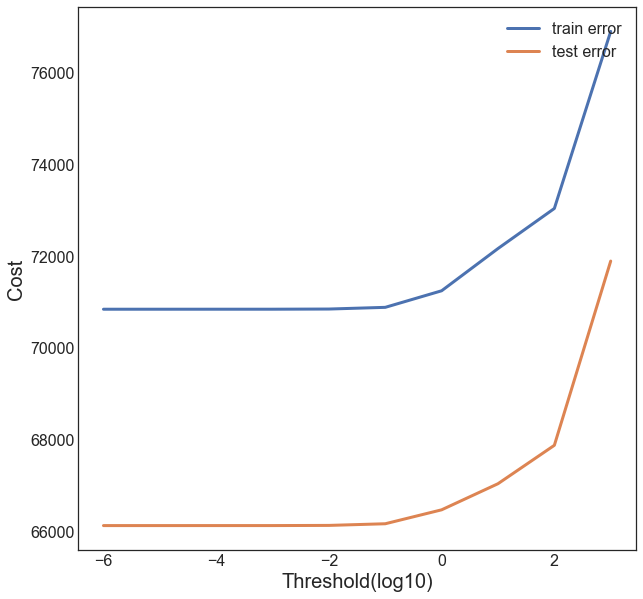

In [105]:
plt.plot(np.log10(thresholds),cost_train, label="train error")
plt.plot(np.log10(thresholds),cost_test, label="test error")
plt.legend(loc="upper right")
plt.xlabel("Threshold(log10)")
plt.ylabel("Cost")
plt.show()

Text(0, 0.5, 'cost')

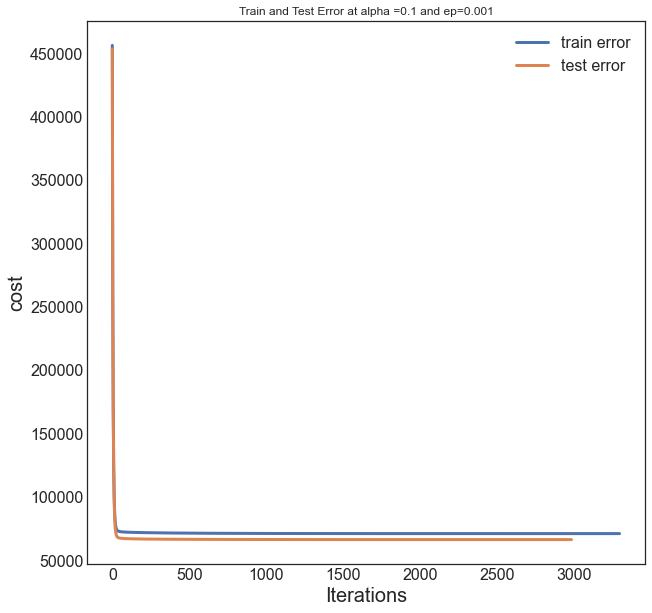

In [106]:
plt.plot(cost_list7,label="train error")
plt.plot(cost_list17,label="test error")
plt.legend(loc="upper right")
plt.title("Train and Test Error at alpha =0.1 and ep=0.001")
plt.xlabel("Iterations")
plt.ylabel("cost")

In [107]:
thresholds = [1e-6, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
epoch_train = [epoch_list8[-1], epoch_list7[-1], epoch_list6[-1], 
              epoch_list5[-1], epoch_list4[-1], epoch_list3[-1], epoch_list2[-1], epoch_list1[-1]]

In [108]:
epoch_train

[6136, 3292, 2343, 1395, 459, 68, 35, 22]

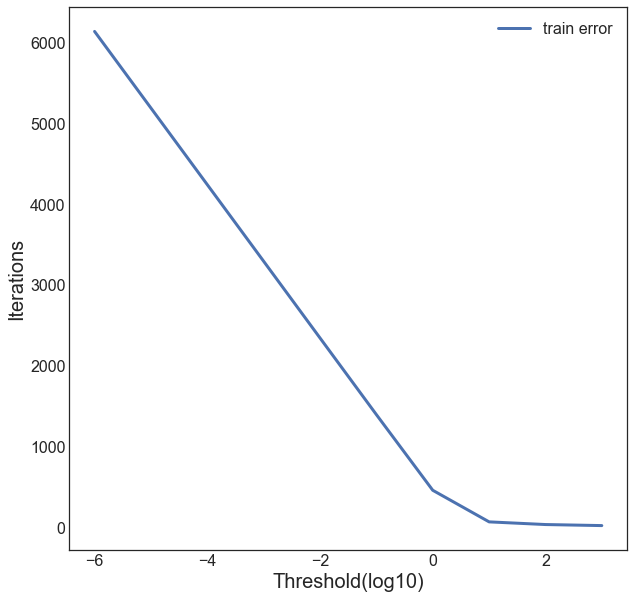

In [109]:
plt.plot(np.log10(thresholds),epoch_train, label="train error")
plt.legend(loc="upper right")
plt.xlabel("Threshold(log10)")
plt.ylabel("Iterations")
plt.show()

## Experiment 3: 

In [110]:
org_Dataset = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')

In [111]:
org_Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [411]:
#subset = org_Dataset.sample(n=9,axis='columns')

In [412]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dew point temperature(°C)  8760 non-null   float64
 1   Holiday                    8760 non-null   int64  
 2   Rainfall(mm)               8760 non-null   float64
 3   Snowfall (cm)              8760 non-null   float64
 4   Solar Radiation (MJ/m2)    8760 non-null   float64
 5   Functioning Day            8760 non-null   int64  
 6   Rented Bike Count          8760 non-null   int64  
 7   Autumn                     8760 non-null   uint8  
 8   Spring                     8760 non-null   uint8  
 9   Summer                     8760 non-null   uint8  
 10  Hour_0                     8760 non-null   uint8  
 11  Hour_1                     8760 non-null   uint8  
 12  Hour_2                     8760 non-null   uint8  
 13  Hour_3                     8760 non-null   uint8

In [179]:
#subset = org_Dataset[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
#                      'Rainfall(mm)','Seasons','Functioning Day']]

In [180]:
subset.head()

Dew point temperature(°C)     Holiday  Rainfall(mm)  Snowfall (cm)  \
0                      -17.6  No Holiday           0.0            0.0   
1                      -17.6  No Holiday           0.0            0.0   
2                      -17.7  No Holiday           0.0            0.0   
3                      -17.6  No Holiday           0.0            0.0   
4                      -18.6  No Holiday           0.0            0.0   

   Solar Radiation (MJ/m2) Seasons Functioning Day  Rented Bike Count  Hour  
0                      0.0  Winter             Yes                254     0  
1                      0.0  Winter             Yes                204     1  
2                      0.0  Winter             Yes                173     2  
3                      0.0  Winter             Yes                107     3  
4                      0.0  Winter             Yes                 78     4

In [181]:
subset.isnull().sum()

Dew point temperature(°C)    0
Holiday                      0
Rainfall(mm)                 0
Snowfall (cm)                0
Solar Radiation (MJ/m2)      0
Seasons                      0
Functioning Day              0
Rented Bike Count            0
Hour                         0
dtype: int64

In [182]:
subset.describe()

Dew point temperature(°C)  Rainfall(mm)  Snowfall (cm)  \
count                8760.000000   8760.000000    8760.000000   
mean                    4.073813      0.148687       0.075068   
std                    13.060369      1.128193       0.436746   
min                   -30.600000      0.000000       0.000000   
25%                    -4.700000      0.000000       0.000000   
50%                     5.100000      0.000000       0.000000   
75%                    14.800000      0.000000       0.000000   
max                    27.200000     35.000000       8.800000   

       Solar Radiation (MJ/m2)  Rented Bike Count         Hour  
count              8760.000000        8760.000000  8760.000000  
mean                  0.569111         704.602055    11.500000  
std                   0.868746         644.997468     6.922582  
min                   0.000000           0.000000     0.000000  
25%                   0.000000         191.000000     5.750000  
50%                   0.010000         504.500000    11.500000  
75%                   0.930000        1065.250000    17.250000  
max                   3.520000        3556.000000    23.000000

In [183]:
dummies = pd.get_dummies(subset.Seasons)
subset = pd.concat([subset, dummies], axis='columns')
subset = subset.drop(['Seasons', 'Winter'], axis='columns') 
subset.head()

Dew point temperature(°C)     Holiday  Rainfall(mm)  Snowfall (cm)  \
0                      -17.6  No Holiday           0.0            0.0   
1                      -17.6  No Holiday           0.0            0.0   
2                      -17.7  No Holiday           0.0            0.0   
3                      -17.6  No Holiday           0.0            0.0   
4                      -18.6  No Holiday           0.0            0.0   

   Solar Radiation (MJ/m2) Functioning Day  Rented Bike Count  Hour  Autumn  \
0                      0.0             Yes                254     0       0   
1                      0.0             Yes                204     1       0   
2                      0.0             Yes                173     2       0   
3                      0.0             Yes                107     3       0   
4                      0.0             Yes                 78     4       0   

   Spring  Summer  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [184]:
dummies = pd.get_dummies(subset.Hour)
subset = pd.concat([subset, dummies], axis='columns')
subset = subset.drop(['Hour', 23], axis='columns') 
subset.rename(columns = {0:'Hour_0',1:'Hour_1',2:'Hour_2',3:'Hour_3',4:'Hour_4',5:'Hour_5',6:'Hour_6',7:'Hour_7',8:'Hour_8',9:'Hour_9',
                         10:'Hour_10',11:'Hour_11',12:'Hour_12',13:'Hour_13',14:'Hour_14',15:'Hour_15',
                         16:'Hour_16',17:'Hour_17',18:'Hour_18',19:'Hour_19',20:'Hour_20',21:'Hour_21',22:'Hour_22'}, inplace = True)
subset.head()

Dew point temperature(°C)     Holiday  Rainfall(mm)  Snowfall (cm)  \
0                      -17.6  No Holiday           0.0            0.0   
1                      -17.6  No Holiday           0.0            0.0   
2                      -17.7  No Holiday           0.0            0.0   
3                      -17.6  No Holiday           0.0            0.0   
4                      -18.6  No Holiday           0.0            0.0   

   Solar Radiation (MJ/m2) Functioning Day  Rented Bike Count  Autumn  Spring  \
0                      0.0             Yes                254       0       0   
1                      0.0             Yes                204       0       0   
2                      0.0             Yes                173       0       0   
3                      0.0             Yes                107       0       0   
4                      0.0             Yes                 78       0       0   

   Summer  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
0       0  ...        0        0        0        0        0        0        0   
1       0  ...        0        0        0        0        0        0        0   
2       0  ...        0        0        0        0        0        0        0   
3       0  ...        0        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0        0   

   Hour_20  Hour_21  Hour_22  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0  

[5 rows x 33 columns]

In [185]:
subset['Functioning Day'] = subset['Functioning Day'].map(
                   {'Yes':1 ,'No':0})

In [190]:
subset['Holiday'] = subset['Holiday'].map(
                   {'Holiday':1 ,'No Holiday':0})

In [191]:
subset.head()

Dew point temperature(°C)  Holiday  Rainfall(mm)  Snowfall (cm)  \
0                      -17.6        0           0.0            0.0   
1                      -17.6        0           0.0            0.0   
2                      -17.7        0           0.0            0.0   
3                      -17.6        0           0.0            0.0   
4                      -18.6        0           0.0            0.0   

   Solar Radiation (MJ/m2)  Functioning Day  Rented Bike Count  Autumn  \
0                      0.0                1                254       0   
1                      0.0                1                204       0   
2                      0.0                1                173       0   
3                      0.0                1                107       0   
4                      0.0                1                 78       0   

   Spring  Summer  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0       0       0  ...        0        0        0        0        0        0   
1       0       0  ...        0        0        0        0        0        0   
2       0       0  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 33 columns]

array([[<AxesSubplot:title={'center':'Temperature(°C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Functioning Day'}>],
       [<AxesSubplot:title={'center':'Autumn'}>,
        <AxesSubplot:title={'center':'Spring'}>,
        <AxesSubplot:title={'center':'Summer'}>],
       [<AxesSubplot:title={'center':'Hour_0'}>,
        <AxesSubplot:title={'center':'Hour_1'}>,
        <AxesSubplot:title={'center':'Hour_2'}>],
       [<AxesSubplot:title={'center':'Hour_3'}>,
        <AxesSubplot:title={'center':'Hour_4'}>,
        <AxesSubplot:title={'center':'Hour_5'}>],
       [<AxesSubplot:title={'center':'Hour_6'}>,
        <AxesSubplot:title={'center':'Hour_7'}>,
        <AxesSubplot:title={'center':'Hour_8'}>],
       [<AxesSubplot:title={'center':'Hour_9'}>,
        <AxesS

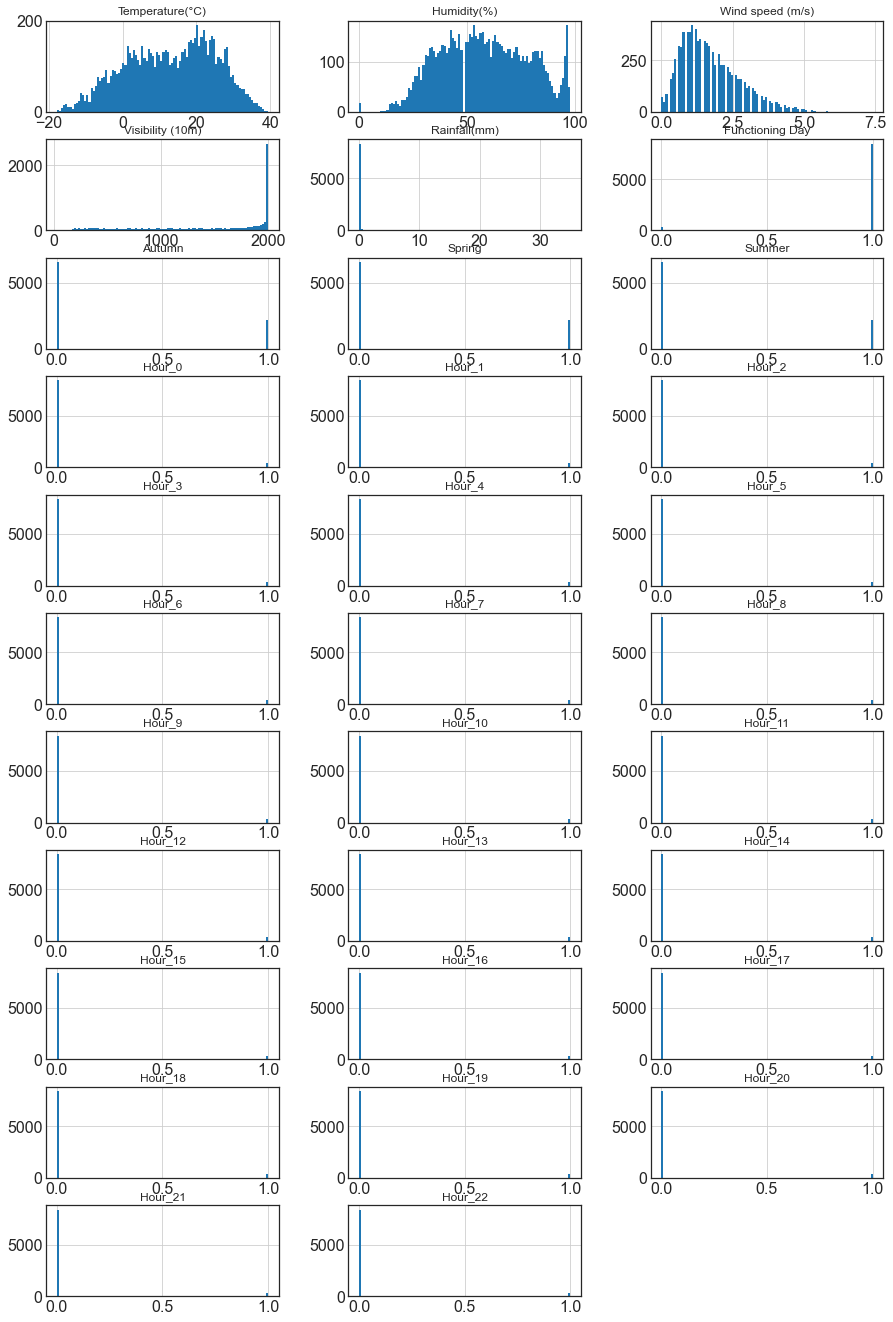

In [235]:
subset.hist(column=list(subset)[1:], figsize=(15,30),bins=100, layout=(14,3))

In [236]:
subset.skew(axis=0, skipna=True, level=None)

Rented Bike Count     1.153428
Temperature(°C)      -0.198326
Humidity(%)           0.059579
Wind speed (m/s)      0.890955
Visibility (10m)     -0.701786
Rainfall(mm)         14.533232
Functioning Day      -5.170969
Autumn                1.159123
Spring                1.142294
Summer                1.142294
Hour_0                4.588103
Hour_1                4.588103
Hour_2                4.588103
Hour_3                4.588103
Hour_4                4.588103
Hour_5                4.588103
Hour_6                4.588103
Hour_7                4.588103
Hour_8                4.588103
Hour_9                4.588103
Hour_10               4.588103
Hour_11               4.588103
Hour_12               4.588103
Hour_13               4.588103
Hour_14               4.588103
Hour_15               4.588103
Hour_16               4.588103
Hour_17               4.588103
Hour_18               4.588103
Hour_19               4.588103
Hour_20               4.588103
Hour_21               4.588103
Hour_22 

In [237]:
subset.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count           1.000000         0.538558    -0.199780   
Temperature(°C)             0.538558         1.000000     0.159371   
Humidity(%)                -0.199780         0.159371     1.000000   
Wind speed (m/s)            0.121108        -0.036252    -0.336683   
Visibility (10m)            0.199280         0.034794    -0.543090   
Rainfall(mm)               -0.123074         0.050282     0.236397   
Functioning Day             0.203943        -0.050170    -0.020800   
Autumn                      0.102753         0.059728     0.028367   
Spring                      0.022888         0.007960     0.015694   
Summer                      0.296549         0.665846     0.192595   
Hour_0                     -0.052743        -0.027873     0.069340   
Hour_1                     -0.090012        -0.034210     0.080928   
Hour_2                     -0.130280        -0.040002     0.092992   
Hour_3                     -0.162060        -0.045201     0.101493   
Hour_4                     -0.184930        -0.049869     0.107582   
Hour_5                     -0.182831        -0.054365     0.115690   
Hour_6                     -0.134827        -0.058000     0.122648   
Hour_7                     -0.031876        -0.057642     0.112716   
Hour_8                      0.100578        -0.047239     0.082302   
Hour_9                     -0.018951        -0.026309     0.022457   
Hour_10                    -0.057153         0.000475    -0.032731   
Hour_11                    -0.033542         0.024916    -0.078435   
Hour_12                    -0.001669         0.045027    -0.110055   
Hour_13                     0.009261         0.058879    -0.134240   
Hour_14                     0.017530         0.068674    -0.147539   
Hour_15                     0.040278         0.072505    -0.150092   
Hour_16                     0.073072         0.070066    -0.139767   
Hour_17                     0.140281         0.058864    -0.110644   
Hour_18                     0.258096         0.042210    -0.075489   
Hour_19                     0.158592         0.024399    -0.036126   
Hour_20                     0.117798         0.008845    -0.005319   
Hour_21                     0.105669        -0.002404     0.019287   
Hour_22                     0.070542        -0.011788     0.038870   

                   Wind speed (m/s)  Visibility (10m)  Rainfall(mm)  \
Rented Bike Count          0.121108          0.199280     -0.123074   
Temperature(°C)           -0.036252          0.034794      0.050282   
Humidity(%)               -0.336683         -0.543090      0.236397   
Wind speed (m/s)           1.000000          0.171507     -0.019674   
Visibility (10m)           0.171507          1.000000     -0.167629   
Rainfall(mm)              -0.019674         -0.167629      1.000000   
Functioning Day            0.005037         -0.026000      0.002055   
Autumn                    -0.128009          0.117413     -0.013247   
Spring                     0.083855         -0.187498      0.017595   
Summer                    -0.064698          0.061958      0.053928   
Hour_0                    -0.054573         -0.001181     -0.000644   
Hour_1                    -0.088698         -0.007546     -0.015987   
Hour_2                    -0.100827         -0.018590     -0.009556   
Hour_3                    -0.106119         -0.026804     -0.000340   
Hour_4                    -0.102150         -0.033437      0.001281   
Hour_5                    -0.118358         -0.035332     -0.012645   
Hour_6                    -0.121941         -0.042894      0.002294   
Hour_7                    -0.108214         -0.047348     -0.001656   
Hour_8                    -0.089470         -0.040212      0.002496   
Hour_9                    -0.051927         -0.035872      0.024170   
Hour_10                   -0.010305         -0.020114     -0.002517   
Hour_11                    0.039973         -0.003087      0.003610   
Hour_

In [413]:
# Independent vs target variable
y1 = subset['Rented Bike Count']                  # Target variable
x1 = subset.drop(['Rented Bike Count'],axis=1)    # Predictor variable

In [414]:
# Split: Train and Test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1)  # shuffle=True

In [415]:
x1_train.head()

Dew point temperature(°C)  Holiday  Rainfall(mm)  Snowfall (cm)  \
5129                       22.9        0           0.0            0.0   
6490                       20.6        0           0.0            0.0   
6672                       14.0        0           0.0            0.0   
68                          3.2        0           0.0            0.0   
8224                       11.0        0           0.0            0.0   

      Solar Radiation (MJ/m2)  Functioning Day  Autumn  Spring  Summer  \
5129                     0.49                1       0       0       1   
6490                     0.96                1       0       0       1   
6672                     0.00                1       1       0       0   
68                       0.00                1       0       0       0   
8224                     0.02                1       1       0       0   

      Hour_0  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
5129       0  ...        0        0        0        0        1        0   
6490       0  ...        0        0        0        0        0        0   
6672       1  ...        0        0        0        0        0        0   
68         0  ...        0        0        0        0        0        0   
8224       0  ...        0        0        0        1        0        0   

      Hour_19  Hour_20  Hour_21  Hour_22  
5129        0        0        0        0  
6490        0        0        0        0  
6672        0        0        0        0  
68          0        1        0        0  
8224        0        0        0        0  

[5 rows x 32 columns]

In [416]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 5129 to 235
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dew point temperature(°C)  6132 non-null   float64
 1   Holiday                    6132 non-null   int64  
 2   Rainfall(mm)               6132 non-null   float64
 3   Snowfall (cm)              6132 non-null   float64
 4   Solar Radiation (MJ/m2)    6132 non-null   float64
 5   Functioning Day            6132 non-null   int64  
 6   Autumn                     6132 non-null   uint8  
 7   Spring                     6132 non-null   uint8  
 8   Summer                     6132 non-null   uint8  
 9   Hour_0                     6132 non-null   uint8  
 10  Hour_1                     6132 non-null   uint8  
 11  Hour_2                     6132 non-null   uint8  
 12  Hour_3                     6132 non-null   uint8  
 13  Hour_4                     6132 non-null   uin

In [417]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train_transform=sc.fit_transform(x1_train)

In [418]:
sc=StandardScaler()
x1_test_transform=sc.fit_transform(x1_test)

In [419]:
print(x1_test_transform)

[[ 0.54168014  4.43766981 -0.13787569 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 1.09507545 -0.22534349 -0.13787569 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.06622782 -0.22534349 -0.13787569 ... -0.19992084 -0.21585871
  -0.19260192]
 ...
 [-1.44586641 -0.22534349 -0.13787569 ... -0.19992084 -0.21585871
  -0.19260192]
 [-0.40143019 -0.22534349 -0.13787569 ... -0.19992084 -0.21585871
  -0.19260192]
 [-1.17306591 -0.22534349 -0.13787569 ... -0.19992084 -0.21585871
   5.19205613]]


In [420]:
from sklearn.linear_model import LinearRegression
LRModel1 = LinearRegression()
LRModel1.fit(x1_train_transform, y1_train)

LinearRegression()

In [421]:
LRModel1.score(x1_train_transform, y1_train)

0.6152345888739386

In [422]:
LRModel1.score(x1_test_transform, y1_test)

0.6214602066276693

In [423]:
print(f'intercept: {LRModel1.intercept_}')
print(f'slopes: {LRModel1.coef_}')

intercept: 702.5843118069146
slopes: [  67.3106955   -18.89116219  -90.03522029  -19.63910731  202.40214765
  161.73918187  235.79252297  148.76284953  232.73046109  -24.23077138
  -48.57239743  -74.71007232  -95.08994774  -99.98686433 -107.37619752
  -73.81267379  -13.59169779   55.05398914  -34.12148468  -84.26655663
  -80.92859365  -78.6820513   -71.50204846  -61.79827347  -40.08783161
   -1.68275985   52.88191181  149.1371315   106.03862185   79.22039182
   78.93552725   50.18665338]


In [424]:
y1_pred = LRModel1.predict(x1_test_transform)
print(f"predicted response:\n{y1_pred}")

predicted response:
[1151.86376216 1023.30721404  723.70489144 ... -113.94223021 1069.64926352
  536.11514357]


In [425]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y1_test, y1_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

R^2: 0.621
Mean Absolute Error: 295.799
Mean Squared Error: 153470.289
Root Mean Squared Error: 391.753


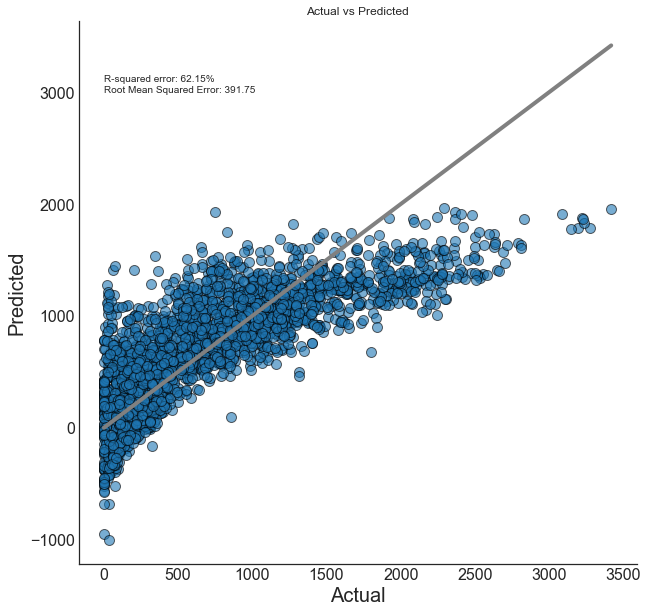

In [426]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y1_test,
                y=y1_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y1_test),max(y1_test)],
             y=[min(y1_test),max(y1_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(LRModel1.score(x1_test_transform,y1_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(y1_test,y1_pred,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

In [427]:
def batch_gradient_descent(x,y, epoch, learning_rate,ep):



    number_of_variables = x.shape[1]
    converged = False
    coef = 0
    beta = np.ones(shape=(number_of_variables))
    y_predicted = np.dot(beta, x.T) + coef



    costinit = np.inf
    sample_size = x.shape[0]



    cost_list = []
    epoch_list = []
    stepsize_beta_list=[]
    stepsize_coef_list=[]
    i=0
    while not converged:
        # print(i)
        y_predicted = np.dot(beta, x.T) + coef
        beta_grad = -(1/sample_size)*(x.T.dot(y-y_predicted))
        coef_grad = -(1/sample_size)*np.sum(y-y_predicted)



        stepsize_beta = beta - learning_rate*beta_grad
        stepsize_coef = coef - learning_rate*coef_grad
        # print(stepsize_beta,stepsize_coef)



        beta = stepsize_beta
        coef = stepsize_coef

        cost = (1/2)*np.mean(np.square(y-y_predicted))
        cost_list.append(cost)
        #print(cost_list,cost)
        epoch_list.append(i)
        if (costinit < cost):
            print('alpha is high decrease alpha its not converging',costinit,cost,i)
            converged = True
        if (abs(costinit-cost) <= ep):
            print ('Converged, iterations: ', i,costinit,cost,cost_list[i-1],cost_list[i],abs(costinit-cost), '!!!')
            converged = True

        costinit = cost # update error
        i += 1 # update iter

        if i == epoch:
            print ('Max interactions exceeded!',cost)
            converged = True
    return beta,coef,cost_list,epoch_list

In [428]:
beta_1, coef_1, cost_list_1, epoch_list_1 = batch_gradient_descent(x1_train_transform, y1_train, 100000, 0.1, 0.001)
beta_1, coef_1

Converged, iterations:  931 80893.37215484078 80893.37116028903 80893.37215484078 80893.37116028903 0.0009945517522282898 !!!


(array([  67.3713825 ,  -18.89380346,  -90.06807863,  -19.66020714,
         202.14759059,  161.73567942,  235.76731836,  148.76417368,
         232.70877512,  -23.74838317,  -48.11091001,  -74.23455435,
         -94.61361769,  -99.5215052 , -106.89166525,  -73.33338066,
         -13.11833976,   55.55723307,  -33.62124332,  -83.72197646,
         -80.365809  ,  -78.10742606,  -70.92360467,  -61.20888139,
         -39.51822025,   -1.13416398,   53.39463983,  149.62385319,
         106.52796821,   79.70102841,   79.40056078,   50.67105935]),
 702.5843118069141)

In [429]:
beta_2, coef_2, cost_list_2, epoch_list_2 = batch_gradient_descent(x1_test_transform, y1_test, 100000, 0.1,0.001)
beta_2, coef_2

Converged, iterations:  911 75521.82676498445 75521.8257694571 75521.82676498445 75521.8257694571 0.0009955273562809452 !!!


(array([  71.38871829,  -14.90341071,  -96.92744886,  -13.59929888,
         204.06849384,  171.49154967,  240.37594243,  152.02649703,
         237.31460787,  -24.11545838,  -48.05026033,  -67.38162866,
         -82.28764126, -117.05407139,  -99.93058896,  -75.88966481,
         -18.93163138,   55.63765544,  -39.34389426,  -80.78085832,
         -93.71238869,  -69.86737264,  -73.70505315,  -71.78019834,
         -37.8120352 ,  -10.00951837,   67.52238216,  155.56709665,
          82.76025026,   89.18696906,   66.57780101,   50.67651086]),
 709.3101217656008)

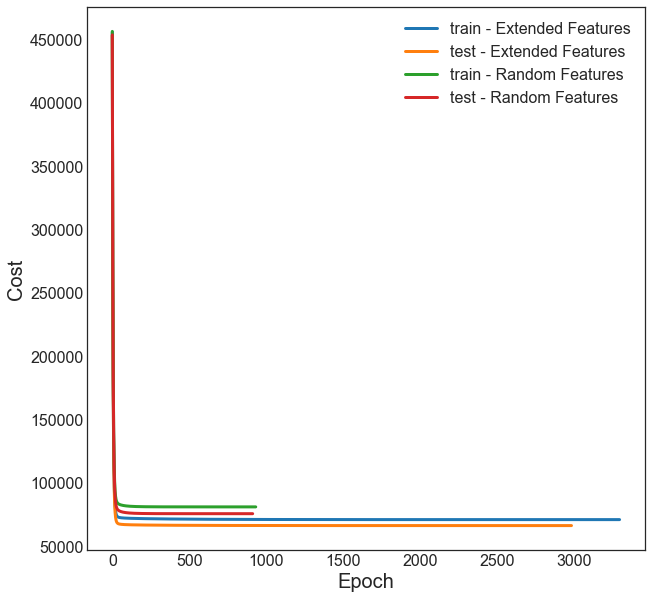

In [214]:
plt.plot(cost_list7,label="train - Extended Features")
plt.plot(cost_list17,label="test - Extended Features")
plt.plot(cost_list_1,label="train - Random Features")
plt.plot(cost_list_2,label="test - Random Features")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

## Experiment 04:

In [215]:
org_Dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [216]:
subset1 = org_Dataset[['Rented Bike Count','Hour','Temperature(°C)','Visibility (10m)',
                       'Solar Radiation (MJ/m2)','Rainfall(mm)','Seasons','Holiday','Functioning Day']]

In [217]:
subset1.head()

Rented Bike Count  Hour  Temperature(°C)  Visibility (10m)  \
0                254     0             -5.2              2000   
1                204     1             -5.5              2000   
2                173     2             -6.0              2000   
3                107     3             -6.2              2000   
4                 78     4             -6.0              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm) Seasons     Holiday Functioning Day  
0                      0.0           0.0  Winter  No Holiday             Yes  
1                      0.0           0.0  Winter  No Holiday             Yes  
2                      0.0           0.0  Winter  No Holiday             Yes  
3                      0.0           0.0  Winter  No Holiday             Yes  
4                      0.0           0.0  Winter  No Holiday             Yes

In [218]:
subset1.describe()

Rented Bike Count         Hour  Temperature(°C)  Visibility (10m)  \
count        8760.000000  8760.000000      8760.000000       8760.000000   
mean          704.602055    11.500000        12.882922       1436.825799   
std           644.997468     6.922582        11.944825        608.298712   
min             0.000000     0.000000       -17.800000         27.000000   
25%           191.000000     5.750000         3.500000        940.000000   
50%           504.500000    11.500000        13.700000       1698.000000   
75%          1065.250000    17.250000        22.500000       2000.000000   
max          3556.000000    23.000000        39.400000       2000.000000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  
count              8760.000000   8760.000000  
mean                  0.569111      0.148687  
std                   0.868746      1.128193  
min                   0.000000      0.000000  
25%                   0.000000      0.000000  
50%                   0.010000      0.000000  
75%                   0.930000      0.000000  
max                   3.520000     35.000000

In [219]:
dummies = pd.get_dummies(subset1.Seasons)
subset1 = pd.concat([subset1, dummies], axis='columns')
subset1 = subset1.drop(['Seasons', 'Winter'], axis='columns') 
subset1.head()

Rented Bike Count  Hour  Temperature(°C)  Visibility (10m)  \
0                254     0             -5.2              2000   
1                204     1             -5.5              2000   
2                173     2             -6.0              2000   
3                107     3             -6.2              2000   
4                 78     4             -6.0              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)     Holiday Functioning Day  Autumn  \
0                      0.0           0.0  No Holiday             Yes       0   
1                      0.0           0.0  No Holiday             Yes       0   
2                      0.0           0.0  No Holiday             Yes       0   
3                      0.0           0.0  No Holiday             Yes       0   
4                      0.0           0.0  No Holiday             Yes       0   

   Spring  Summer  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [220]:
dummies = pd.get_dummies(subset1.Hour)
subset1 = pd.concat([subset1, dummies], axis='columns')
subset1 = subset1.drop(['Hour', 23], axis='columns') 
subset1.rename(columns = {0:'Hour_0',1:'Hour_1',2:'Hour_2',3:'Hour_3',4:'Hour_4',5:'Hour_5',6:'Hour_6',7:'Hour_7',8:'Hour_8',9:'Hour_9',
                         10:'Hour_10',11:'Hour_11',12:'Hour_12',13:'Hour_13',14:'Hour_14',15:'Hour_15',
                         16:'Hour_16',17:'Hour_17',18:'Hour_18',19:'Hour_19',20:'Hour_20',21:'Hour_21',22:'Hour_22'}, inplace = True)
subset1.head()

Rented Bike Count  Temperature(°C)  Visibility (10m)  \
0                254             -5.2              2000   
1                204             -5.5              2000   
2                173             -6.0              2000   
3                107             -6.2              2000   
4                 78             -6.0              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)     Holiday Functioning Day  Autumn  \
0                      0.0           0.0  No Holiday             Yes       0   
1                      0.0           0.0  No Holiday             Yes       0   
2                      0.0           0.0  No Holiday             Yes       0   
3                      0.0           0.0  No Holiday             Yes       0   
4                      0.0           0.0  No Holiday             Yes       0   

   Spring  Summer  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0       0       0  ...        0        0        0        0        0        0   
1       0       0  ...        0        0        0        0        0        0   
2       0       0  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 33 columns]

In [221]:
subset1['Functioning Day'] = subset1['Functioning Day'].map(
                   {'Yes':1 ,'No':0})

In [222]:
subset1['Holiday'] = subset1['Holiday'].map(
                   {'No Holiday':0 ,'Holiday':1})

In [223]:
subset1.head()

Rented Bike Count  Temperature(°C)  Visibility (10m)  \
0                254             -5.2              2000   
1                204             -5.5              2000   
2                173             -6.0              2000   
3                107             -6.2              2000   
4                 78             -6.0              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Holiday  Functioning Day  Autumn  \
0                      0.0           0.0        0                1       0   
1                      0.0           0.0        0                1       0   
2                      0.0           0.0        0                1       0   
3                      0.0           0.0        0                1       0   
4                      0.0           0.0        0                1       0   

   Spring  Summer  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0       0       0  ...        0        0        0        0        0        0   
1       0       0  ...        0        0        0        0        0        0   
2       0       0  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 33 columns]

In [224]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Visibility (10m)         8760 non-null   int64  
 3   Solar Radiation (MJ/m2)  8760 non-null   float64
 4   Rainfall(mm)             8760 non-null   float64
 5   Holiday                  8760 non-null   int64  
 6   Functioning Day          8760 non-null   int64  
 7   Autumn                   8760 non-null   uint8  
 8   Spring                   8760 non-null   uint8  
 9   Summer                   8760 non-null   uint8  
 10  Hour_0                   8760 non-null   uint8  
 11  Hour_1                   8760 non-null   uint8  
 12  Hour_2                   8760 non-null   uint8  
 13  Hour_3                   8760 non-null   uint8  
 14  Hour_4                  

In [225]:
# Independent vs target variable
y2 = subset1['Rented Bike Count']                  # Target variable
x2 = subset1.drop(['Rented Bike Count'],axis=1)    # Predictor variable

In [226]:
# Split: Train and Test
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)  # shuffle=True

In [227]:
x2_train.head()

Temperature(°C)  Visibility (10m)  Solar Radiation (MJ/m2)  \
5129             25.3               751                     0.49   
6490             25.4              1995                     0.96   
6672             21.1              2000                     0.00   
68                5.2               253                     0.00   
8224             11.7               587                     0.02   

      Rainfall(mm)  Holiday  Functioning Day  Autumn  Spring  Summer  Hour_0  \
5129           0.0        0                1       0       0       1       0   
6490           0.0        0                1       0       0       1       0   
6672           0.0        0                1       1       0       0       1   
68             0.0        0                1       0       0       0       0   
8224           0.0        0                1       1       0       0       0   

      ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
5129  ...        0        0        0        0        1        0        0   
6490  ...        0        0        0        0        0        0        0   
6672  ...        0        0        0        0        0        0        0   
68    ...        0        0        0        0        0        0        0   
8224  ...        0        0        0        1        0        0        0   

      Hour_20  Hour_21  Hour_22  
5129        0        0        0  
6490        0        0        0  
6672        0        0        0  
68          1        0        0  
8224        0        0        0  

[5 rows x 32 columns]

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2_train_transform=sc.fit_transform(x2_train)

In [229]:
sc=StandardScaler()
x2_test_transform=sc.fit_transform(x2_test)

In [230]:
print(x2_test_transform)

[[ 0.44609838  0.48057523  0.46898856 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.89918082  0.07930314  0.41197527 ... -0.19992084 -0.21585871
  -0.19260192]
 [ 0.19818534 -0.80316922  1.57504643 ... -0.19992084 -0.21585871
  -0.19260192]
 ...
 [-1.19525687  0.79050082  0.05849286 ... -0.19992084 -0.21585871
  -0.19260192]
 [-0.00698406  0.06462245  0.40057261 ... -0.19992084 -0.21585871
  -0.19260192]
 [-1.01573364 -0.21431058 -0.67127728 ... -0.19992084 -0.21585871
   5.19205613]]


In [231]:
from sklearn.linear_model import LinearRegression
LRModel2 = LinearRegression()
LRModel2.fit(x2_train_transform, y2_train)

LinearRegression()

In [232]:
LRModel2.score(x2_train_transform, y2_train)

0.6434782349074679

In [233]:
LRModel2.score(x2_test_transform, y2_test)

0.6539063114161601

In [234]:
print(f'intercept: {LRModel2.intercept_}')
print(f'slopes: {LRModel2.coef_}')

intercept: 702.5843118069146
slopes: [242.00850366  63.30323833 130.41963166 -79.71871423 -27.2025949
 167.29271688 137.87292325  77.69905142  64.79194332 -20.68303998
 -44.86962414 -68.04458776 -87.5595059  -91.61330061 -95.70153465
 -61.8650439   -1.10067825  68.85493498 -19.67122007 -68.53586314
 -65.68872799 -65.92977402 -60.70320659 -55.30781908 -37.45449252
  -6.34677391  46.35105234 139.24465364  95.89568244  71.3508663
  72.91665521  47.08260655]


In [235]:
y2_pred = LRModel2.predict(x2_test_transform)
print(f"predicted response:\n{y2_pred}")

predicted response:
[1263.51948077 1155.34562308  690.96829138 ...  102.31431844  992.42013455
  558.86779566]


In [236]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y2_test, y2_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

R^2: 0.654
Mean Absolute Error: 281.621
Mean Squared Error: 140315.759
Root Mean Squared Error: 374.587


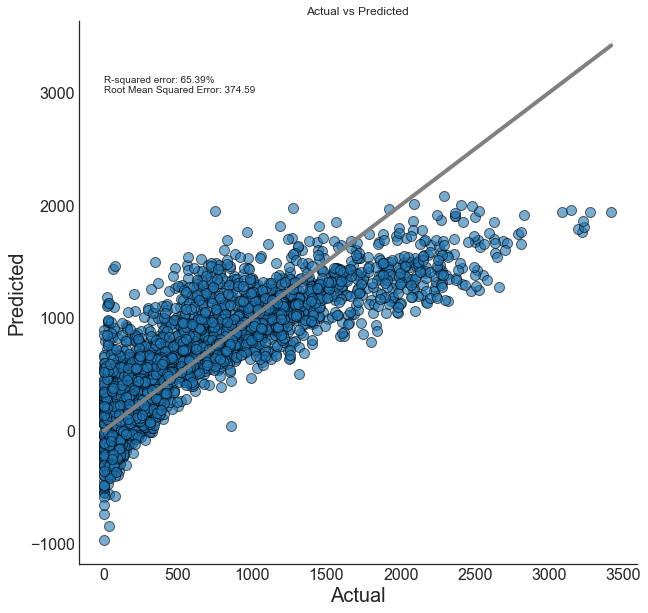

In [237]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y2_test,
                y=y2_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y2_test),max(y2_test)],
             y=[min(y2_test),max(y2_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(LRModel2.score(x2_test_transform,y2_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(y2_test,y2_pred,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

In [238]:
def batch_gradient_descent(x,y, epoch, learning_rate,ep):



    number_of_variables = x.shape[1]
    converged = False
    coef = 0
    beta = np.ones(shape=(number_of_variables))
    y_predicted = np.dot(beta, x.T) + coef



    costinit = np.inf
    sample_size = x.shape[0]



    cost_list = []
    epoch_list = []
    stepsize_beta_list=[]
    stepsize_coef_list=[]
    i=0
    while not converged:
        # print(i)
        y_predicted = np.dot(beta, x.T) + coef
        beta_grad = -(1/sample_size)*(x.T.dot(y-y_predicted))
        coef_grad = -(1/sample_size)*np.sum(y-y_predicted)



        stepsize_beta = beta - learning_rate*beta_grad
        stepsize_coef = coef - learning_rate*coef_grad
        # print(stepsize_beta,stepsize_coef)



        beta = stepsize_beta
        coef = stepsize_coef

        cost = (1/2)*np.mean(np.square(y-y_predicted))
        cost_list.append(cost)
        #print(cost_list,cost)
        epoch_list.append(i)
        if (costinit < cost):
            print('alpha is high decrease alpha its not converging',costinit,cost,i)
            converged = True
        if (abs(costinit-cost) <= ep):
            print ('Converged, iterations: ', i,costinit,cost,cost_list[i-1],cost_list[i],abs(costinit-cost), '!!!')
            converged = True

        costinit = cost # update error
        i += 1 # update iter

        if i == epoch:
            print ('Max interactions exceeded!',cost)
            converged = True
    return beta,coef,cost_list,epoch_list

In [239]:
beta_11, coef_11, cost_list_11, epoch_list_11 = batch_gradient_descent(x2_train_transform, y2_train, 100000, 0.1, 0.01)
beta_11, coef_11

Converged, iterations:  596 74956.54478025131 74956.53482535381 74956.54478025131 74956.53482535381 0.009954897497664206 !!!


(array([242.30196641,  63.42840875, 129.4323772 , -79.80487907,
        -27.21374168, 167.28545128, 137.77748847,  77.73926193,
         64.69051756, -19.15908317, -43.41126782, -66.53730597,
        -86.049886  , -90.1358659 , -94.15845416, -60.33875979,
          0.40824891,  70.46504299, -18.062121  , -66.77440533,
        -63.8596059 , -64.06217292, -58.82596642, -53.40377316,
        -35.62303875,  -4.59810022,  47.97386574, 140.77274849,
         97.4262316 ,  72.85331638,  74.37231037,  48.60305648]),
 702.5843118069141)

In [240]:
beta_12, coef_12, cost_list_12, epoch_list_12 = batch_gradient_descent(x2_test_transform, y2_test, 100000, 0.1,0.01)
beta_12, coef_12

Converged, iterations:  637 69121.22049524503 69121.21050177343 69121.22049524503 69121.21050177343 0.009993471598136239 !!!


(array([ 248.00537291,   61.92771942,  128.56368748,  -86.26410111,
         -19.49798818,  175.42495787,  137.44757515,   72.387062  ,
          62.32512931,  -26.05082564,  -44.11726237,  -63.96592074,
         -75.70196858, -108.03607787,  -94.39576953,  -67.04566888,
          -6.67494084,   68.67585549,  -24.06701303,  -66.20809272,
         -79.97309178,  -55.85717428,  -63.111683  ,  -64.55173919,
         -38.96715612,  -10.46465217,   56.94405684,  142.42572927,
          71.8015028 ,   79.3758591 ,   62.75475502,   50.53019264]),
 709.3101217656008)

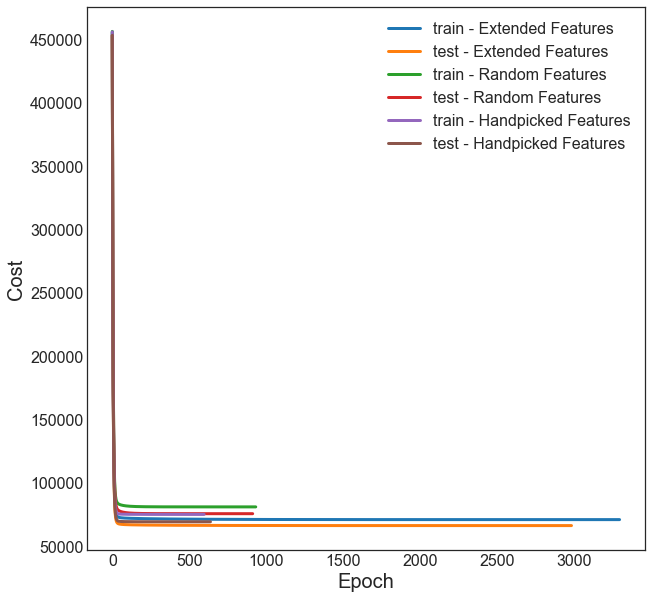

In [242]:
plt.plot(cost_list7,label="train - Extended Features")
plt.plot(cost_list17,label="test - Extended Features")
plt.plot(cost_list_1,label="train - Random Features")
plt.plot(cost_list_2,label="test - Random Features")
plt.plot(cost_list_11,label="train - Handpicked Features")
plt.plot(cost_list_12,label="test - Handpicked Features")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

## Results:

Feature: 0, Score: 276.59910
Feature: 1, Score: -141.95556
Feature: 2, Score: -4.90374
Feature: 3, Score: 3.59927
Feature: 4, Score: 61.94704
Feature: 5, Score: -63.50185
Feature: 6, Score: 9.04723
Feature: 7, Score: -30.01851
Feature: 8, Score: 166.08951
Feature: 9, Score: -156.67139
Feature: 10, Score: -149.76465
Feature: 11, Score: -4.87931
Feature: 12, Score: 332.16643
Feature: 13, Score: 154.08936
Feature: 14, Score: 212.13820
Feature: 15, Score: -20.61151
Feature: 16, Score: -42.98575
Feature: 17, Score: -64.00966
Feature: 18, Score: -82.91784
Feature: 19, Score: -88.22775
Feature: 20, Score: -89.57906
Feature: 21, Score: -55.77453
Feature: 22, Score: 4.06589
Feature: 23, Score: 75.17502
Feature: 24, Score: -15.75115
Feature: 25, Score: -63.93598
Feature: 26, Score: -61.24584
Feature: 27, Score: -60.47138
Feature: 28, Score: -59.59885
Feature: 29, Score: -57.24857
Feature: 30, Score: -41.79216
Feature: 31, Score: -13.98700
Feature: 32, Score: 35.89716
Feature: 33, Score: 128.0266

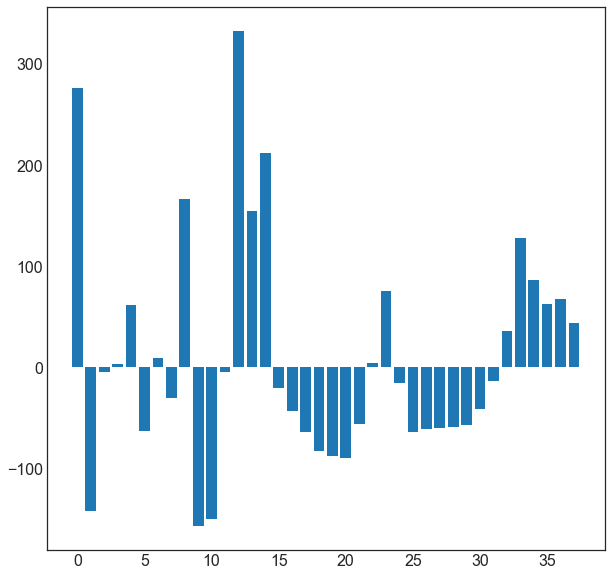

In [430]:
# get variable importance
importance = LRModel.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot variable importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [441]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  Year                     8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  Autumn                   8760 non-null   uint8  
 14  Spring                  

## Transforming Y for better prediction

In [443]:
Dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
0        0                1  ...        0        0        0        0        0   
1        0                1  ...        0        0        0        0        0   
2        0                1  ...        0        0        0        0        0   
3        0                1  ...        0        0        0        0        0   
4        0                1  ...        0        0        0        0        0   

   Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 39 columns]

In [445]:
# Independent vs target variable
ys = np.sqrt(Dataset['Rented Bike Count'])                  # Target variable
xs = Dataset.drop(['Rented Bike Count'],axis=1)    # Predictor variable

In [446]:
# Split: Train and Test
from sklearn.model_selection import train_test_split
xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [447]:
xs_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5129             25.3           87               0.6               751   
6490             25.4           75               0.7              1995   
6672             21.1           64               1.5              2000   
68                5.2           87               1.4               253   
8224             11.7           96               1.4               587   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
5129                     0.49           0.0            0.0        0   
6490                     0.96           0.0            0.0        0   
6672                     0.00           0.0            0.0        0   
68                       0.00           0.0            0.0        0   
8224                     0.02           0.0            0.0        0   

      Functioning Day  Year  ...  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  \
5129                1  2018  ...        0        0        0        0        1   
6490                1  2018  ...        0        0        0        0        0   
6672                1  2018  ...        0        0        0        0        0   
68                  1  2017  ...        0        0        0        0        0   
8224                1  2018  ...        0        0        0        1        0   

      Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  
5129        0        0        0        0        0  
6490        0        0        0        0        0  
6672        0        0        0        0        0  
68          0        0        1        0        0  
8224        0        0        0        0        0  

[5 rows x 38 columns]

In [448]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs_train_transform=sc.fit_transform(xs_train)

In [449]:
sc=StandardScaler()
xs_test_transform=sc.fit_transform(xs_test)

In [450]:
from sklearn.linear_model import LinearRegression
LRModels = LinearRegression()
LRModels.fit(xs_train_transform, ys_train)

LinearRegression()

In [451]:
LRModels.score(xs_train_transform, ys_train)

0.7493833969473693

In [452]:
LRModels.score(xs_test_transform, ys_test)

0.7571443689976207

In [459]:
print(f'intercept: {LRModels.intercept_}')
print(f'slopes: {LRModels.coef_}')
ys_pred = LRModels.predict(xs_test_transform)
print(f"predicted response:\n{ys_pred}")

intercept: 23.367643066032326
slopes: [ 5.11033179e+00 -3.02753878e+00 -2.08255176e-01 -1.79848941e-03
  9.66890998e-01 -1.70375673e+00 -3.16482239e-02 -6.73039628e-01
  5.07754387e+00 -2.38952646e+00 -1.93175520e+00 -3.46817433e-02
  5.97327998e+00  3.14594656e+00  4.02518374e+00 -3.15703348e-01
 -7.63620696e-01 -1.32335497e+00 -1.86785958e+00 -2.22196620e+00
 -2.21735035e+00 -1.22401318e+00  3.69447601e-02  1.17818290e+00
 -1.75390532e-01 -1.10433934e+00 -9.86817976e-01 -9.60073952e-01
 -9.61964308e-01 -9.71468320e-01 -7.21810472e-01 -3.28714593e-01
  4.26433198e-01  1.66248264e+00  1.13947655e+00  8.82088340e-01
  9.98820564e-01  6.69001530e-01]
predicted response:
[31.44965252 32.97849304 25.14894191 ... 13.60052026 30.9366316
 22.06602856]


In [460]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(ys_test, ys_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(ys_test, ys_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(ys_test, ys_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(ys_test, ys_pred)))

R^2: 0.757
Mean Absolute Error: 4.660
Mean Squared Error: 36.768
Root Mean Squared Error: 6.064


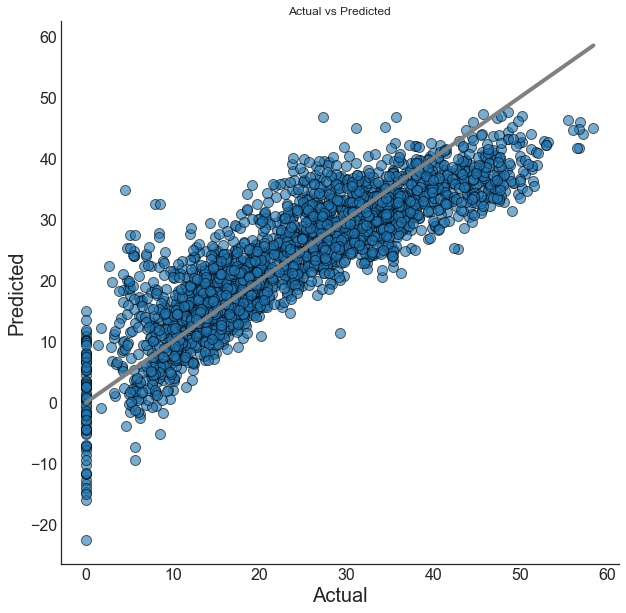

In [461]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=ys_test,
                y=ys_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(ys_test),max(ys_test)],
             y=[min(ys_test),max(ys_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(LRModels.score(xs_test_transform,ys_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(ys_test,ys_pred,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

In [462]:
def batch_gradient_descent(x,y, epoch, learning_rate,ep):



    number_of_variables = x.shape[1]
    converged = False
    coef = 0
    beta = np.ones(shape=(number_of_variables))
    y_predicted = np.dot(beta, x.T) + coef



    costinit = np.inf
    sample_size = x.shape[0]



    cost_list = []
    epoch_list = []
    stepsize_beta_list=[]
    stepsize_coef_list=[]
    i=0
    while not converged:
        # print(i)
        y_predicted = np.dot(beta, x.T) + coef
        beta_grad = -(1/sample_size)*(x.T.dot(y-y_predicted))
        coef_grad = -(1/sample_size)*np.sum(y-y_predicted)



        stepsize_beta = beta - learning_rate*beta_grad
        stepsize_coef = coef - learning_rate*coef_grad
        # print(stepsize_beta,stepsize_coef)



        beta = stepsize_beta
        coef = stepsize_coef

        cost = (1/2)*np.mean(np.square(y-y_predicted))
        cost_list.append(cost)
        #print(cost_list,cost)
        epoch_list.append(i)
        if (costinit < cost):
            print('alpha is high decrease alpha its not converging',costinit,cost,i)
            converged = True
        if (abs(costinit-cost) <= ep):
            print ('Converged, iterations: ', i,costinit,cost,cost_list[i-1],cost_list[i],abs(costinit-cost), '!!!')
            converged = True

        costinit = cost # update error
        i += 1 # update iter

        if i == epoch:
            print ('Max interactions exceeded!',cost)
            converged = True
    return beta,coef,cost_list,epoch_list

In [463]:
beta_1s, coef_1s, cost_list_1s, epoch_list_1s = batch_gradient_descent(xs_train_transform, ys_train, 100000, 0.1, 0.01)
beta_1s, coef_1s

Converged, iterations:  64 20.607462758329167 20.59760878122283 20.607462758329167 20.59760878122283 0.009853977106335066 !!!


(array([ 4.42040352, -2.26881814, -0.32696406,  0.42664672,  1.13710223,
        -1.83634624, -0.1789648 , -0.64631803,  5.02023141,  0.9876775 ,
         1.82259552,  0.07787912,  1.9561058 ,  2.06703439,  1.65482164,
         0.72563616,  0.21466967, -0.33145368, -0.87928989, -1.24981904,
        -1.22394215, -0.24358694,  1.00122747,  2.1817451 ,  0.81791792,
        -0.03557903,  0.10547112,  0.14974172,  0.18519849,  0.22977597,
         0.4726299 ,  0.87757051,  1.59901256,  2.80132414,  2.28155649,
         2.00856733,  2.05402718,  1.74018025]),
 23.342847271790514)

In [464]:
beta_2s, coef_2s, cost_list_2s, epoch_list_2s = batch_gradient_descent(xs_test_transform, ys_test, 100000, 0.1, 0.01)
beta_2s, coef_2s

Converged, iterations:  63 18.88241483364576 18.872663972659957 18.88241483364576 18.872663972659957 0.00975086098580391 !!!


(array([ 4.406735  , -1.93190865,  0.05962908,  0.43612815,  1.19444105,
        -2.04423122, -0.09168003, -0.51621068,  5.20464308,  1.11257122,
         1.86054018, -0.08220884,  1.96550496,  1.87704181,  1.66385006,
         0.5990152 ,  0.27932735, -0.24359946, -0.70035419, -1.37978223,
        -1.2591492 , -0.38274617,  1.01262935,  2.17767917,  0.93518295,
         0.11702714, -0.11902382,  0.26483099,  0.20689646,  0.07889751,
         0.42596677,  0.7959848 ,  1.80372036,  2.88563521,  1.9537652 ,
         2.022731  ,  1.94522801,  1.74524747]),
 23.592299398996357)